In [1]:
import pandas as pd

celltype_maker = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/GO_analysis/midgut_subtype_marker.csv', index_col=0).melt(var_name='type', value_name='name')
celltype_score = pd.read_csv('/mnt/c/Users/ouyangkang/Desktop/GO_analysis/midgut_subtype_marker_score.csv', index_col=0).melt(var_name='type', value_name='score')

celltype_maker.type = celltype_maker.type.str.split('names.').str[1]
celltype_score.type = celltype_score.type.str.split('scores.').str[1]

celltype_maker['type'] = [f"{i}_{k}" for i, k in enumerate(celltype_maker['type'].tolist())]
celltype_score['type'] = [f"{i}_{k}" for i, k in enumerate(celltype_score['type'].tolist())]

merged_data = celltype_maker.merge(celltype_score, on='type')

In [3]:
filtered_data = merged_data[merged_data.index % 200 < 20]
filtered_data.type = filtered_data.type.str.split('_').str[1]

/tmp/ipykernel_2263/95434717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.type = filtered_data.type.str.split('_').str[1]


In [4]:
filtered_data           

type     name     score
0     adult.midgut.progenitors      sna  0.597076
1     adult.midgut.progenitors      hdc  0.596462
2     adult.midgut.progenitors      esg  0.490413
3     adult.midgut.progenitors  GAPcenA  0.487838
4     adult.midgut.progenitors  Sox100B  0.441633
...                        ...      ...       ...
4415         midgut.primordium     Inx3  0.392583
4416         midgut.primordium  CG45116  0.389126
4417         midgut.primordium     Prat  0.383693
4418         midgut.primordium     bowl  0.370207
4419         midgut.primordium     Ance  0.365069

[460 rows x 3 columns]

In [16]:
cell_gene_dict = filtered_data.groupby('type')['name'].apply(list).to_dict()

In [2]:
import gseapy as gp
import matplotlib.pyplot as plt

# if using another organism please modify
gp.get_library_name(organism="fly")

['Allele_LoF_Phenotypes_from_FlyBase_2017',
 'Allele_Phenotypes_from_FlyBase_2017',
 'Anatomy_AutoRIF',
 'Anatomy_AutoRIF_Predicted_zscore',
 'Anatomy_GeneRIF',
 'Anatomy_GeneRIF_Predicted_zscore',
 'Coexpression_Predicted_GO_Biological_Process_2018',
 'Coexpression_Predicted_GO_Cellular_Component_2018',
 'Coexpression_Predicted_GO_Molecular_Function_2018',
 'GO_Biological_Process_2018',
 'GO_Biological_Process_AutoRIF',
 'GO_Biological_Process_AutoRIF_Predicted_zscore',
 'GO_Biological_Process_GeneRIF',
 'GO_Biological_Process_GeneRIF_Predicted_zscore',
 'GO_Cellular_Component_2018',
 'GO_Cellular_Component_AutoRIF',
 'GO_Cellular_Component_AutoRIF_Predicted_zscore',
 'GO_Cellular_Component_GeneRIF',
 'GO_Cellular_Component_GeneRIF_Predicted_zscore',
 'GO_Molecular_Function_2018',
 'GO_Molecular_Function_AutoRIF',
 'GO_Molecular_Function_AutoRIF_Predicted_zscore',
 'GO_Molecular_Function_GeneRIF',
 'GO_Molecular_Function_GeneRIF_Predicted_zscore',
 'Human_Disease_from_FlyBase_2017',
 

In [27]:
def go_analysis(gene_list, gene_library, outdir, cut_off=0.05, title=None):
    enr_res = gp.enrichr(gene_list=gene_list,
                         gene_sets=gene_library,
                         organism='fly',
                         outdir= outdir,
                         cutoff=cut_off)
    
    enr_res.res2d.Term = enr_res.res2d.Term.str.split("\(GO").str[0]

    if len(gene_library.split('_')) > 2:
        name = title + '^-^' + gene_library.split('_')[1][0] + gene_library.split('_')[2][0] + '^-^' + str(cut_off)
    else:
        name = title + '^-^' + gene_library.split('_')[0] + '^-^' + str(cut_off)

    gp.dotplot(enr_res.res2d,
           figsize=(3,5),
           title=name,
           cmap= plt.cm.autumn_r,
           cutoff=cut_off)

In [28]:
libraries = ['GO_Biological_Process_2018', 'GO_Cellular_Component_2018', 'GO_Molecular_Function_2018', 'KEGG_2019']

/home/ouyangkang/software/anaconda3/envs/scRNA/lib/python3.8/site-packages/gseapy/plot.py:753: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=self.figsize)


Sorry! No enrich terms
Sorry! No enrich terms
Sorry! No enrich terms


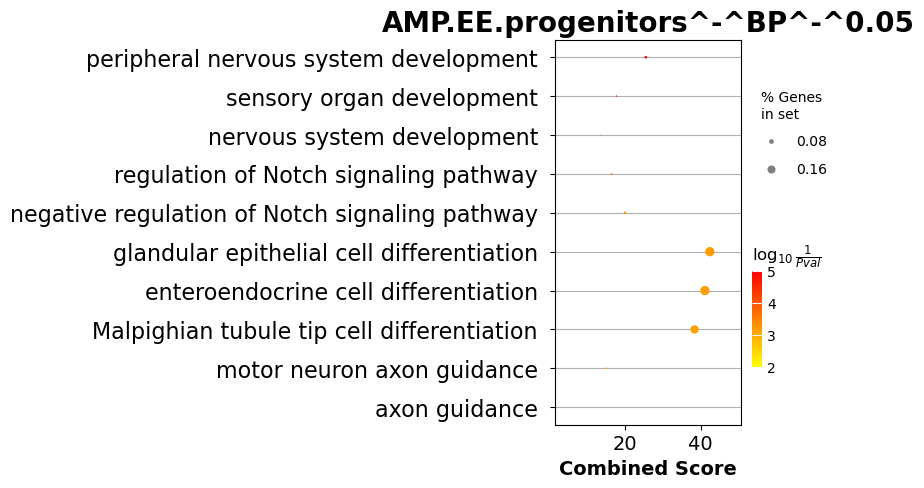

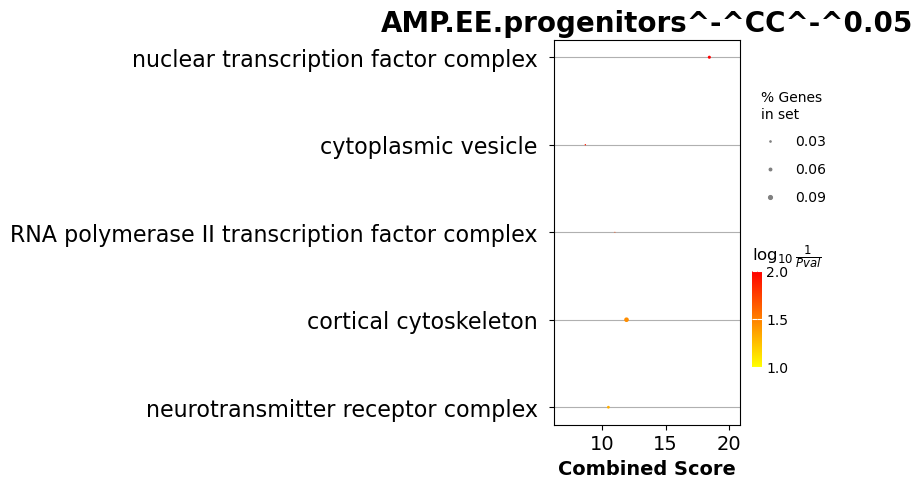

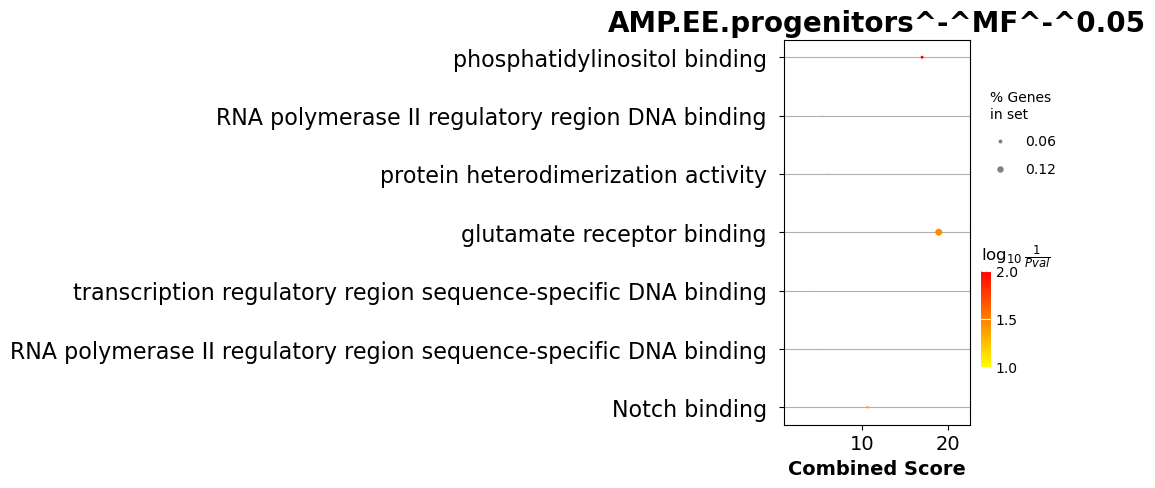

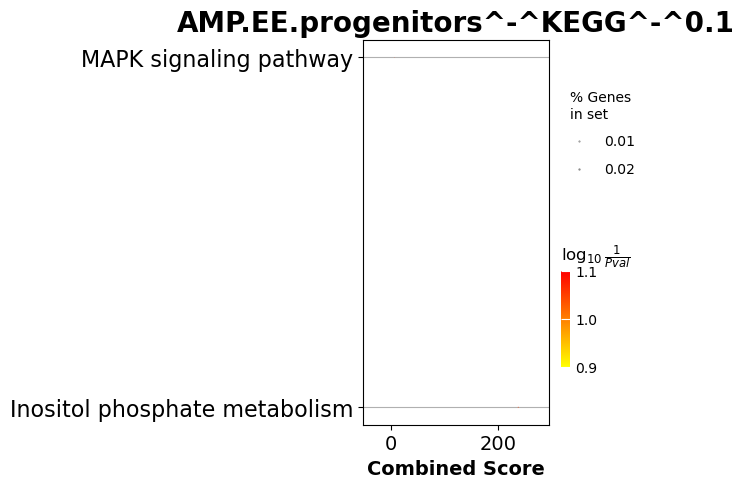

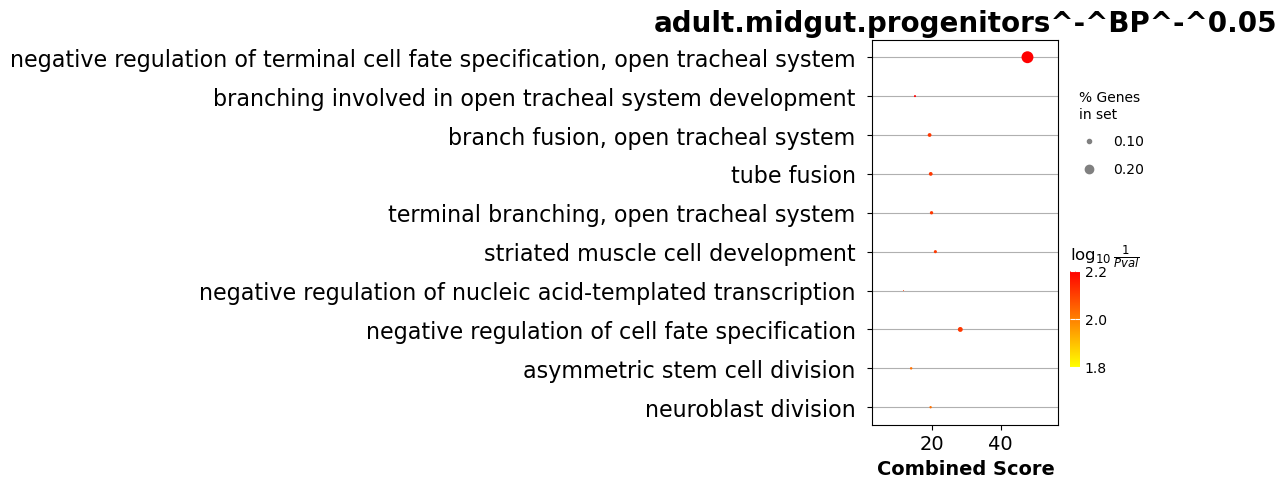

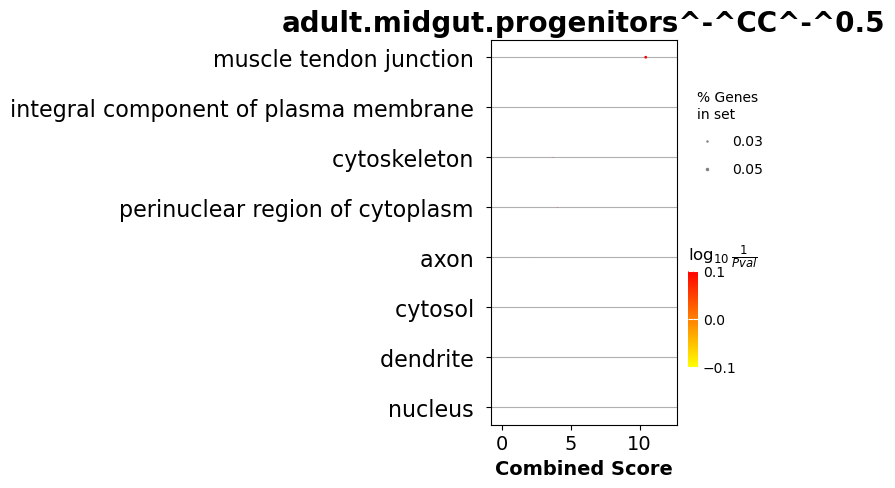

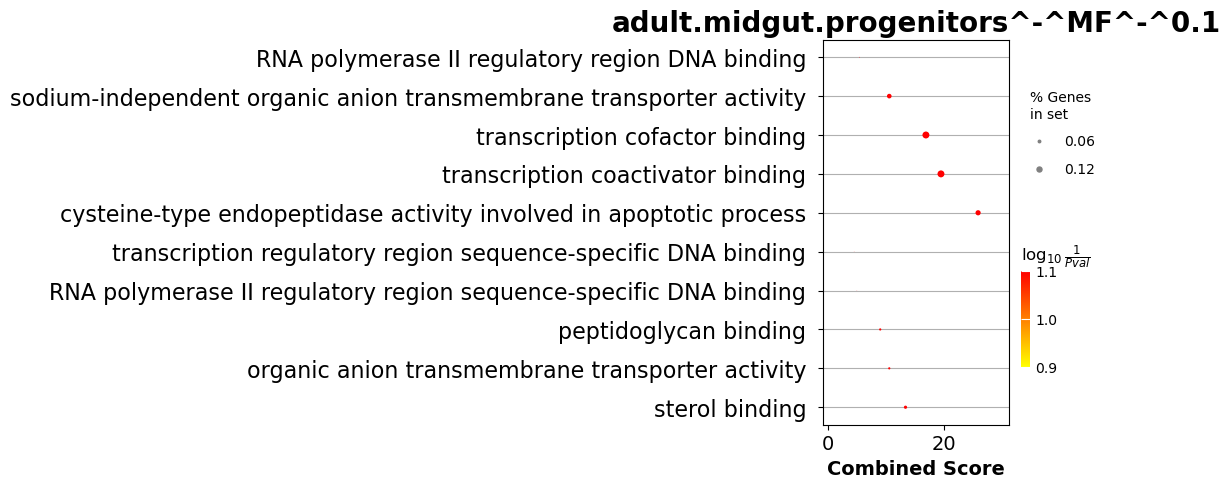

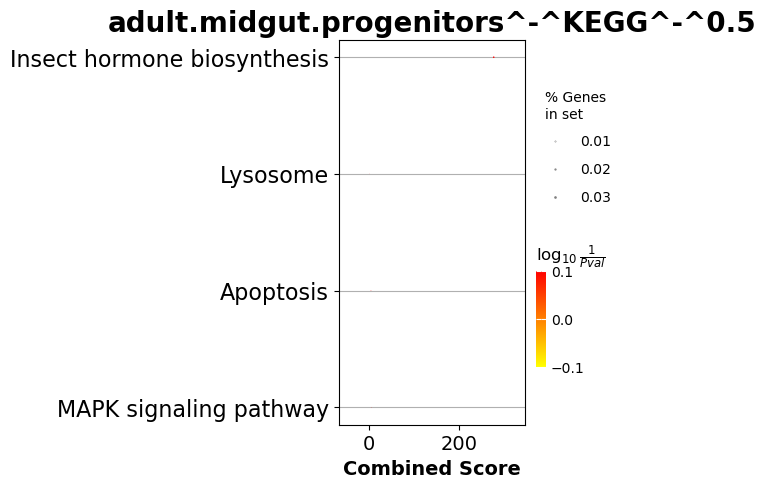

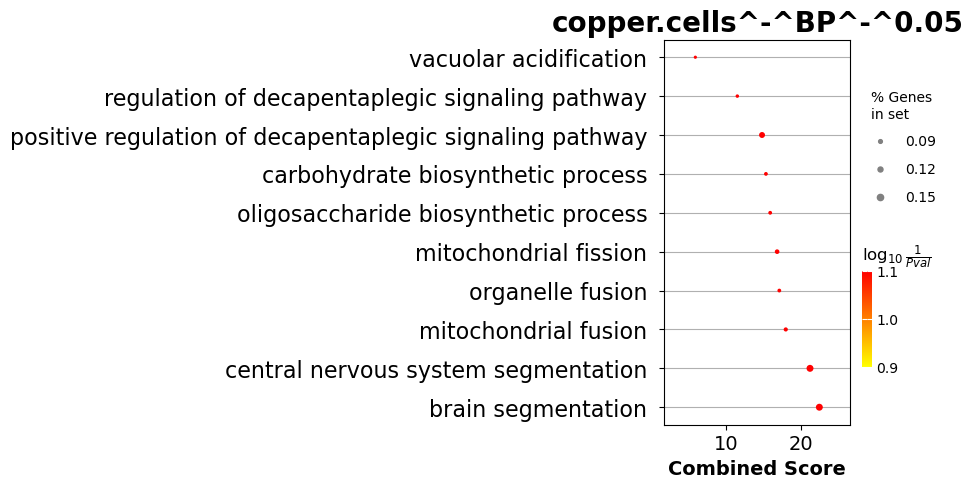

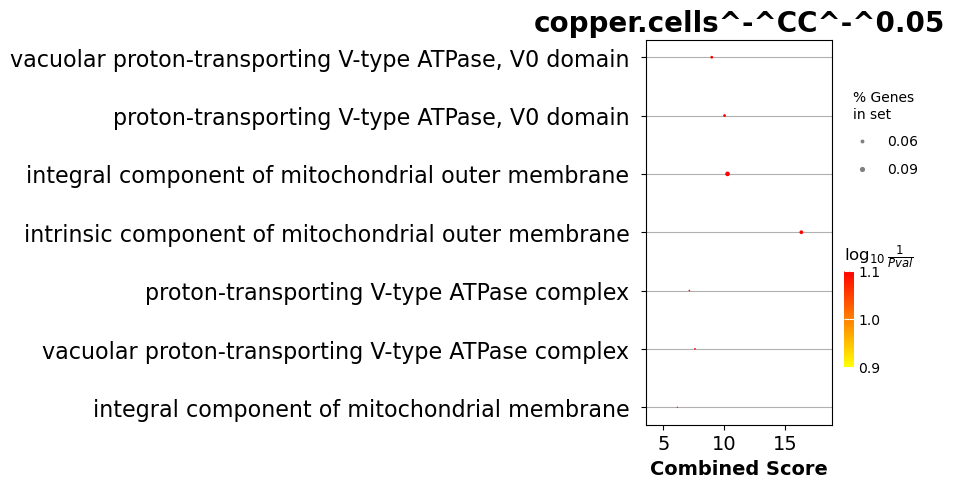

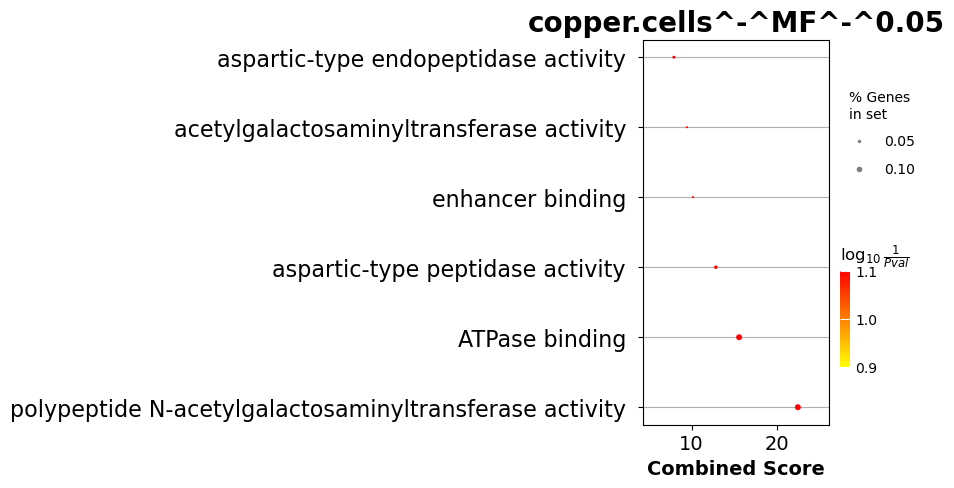

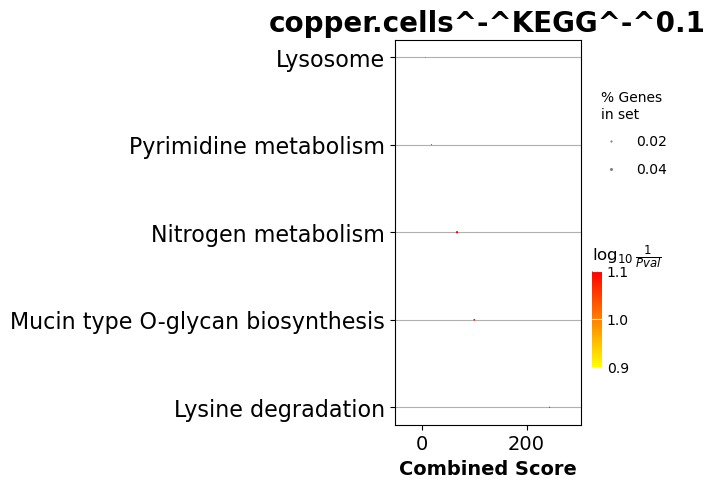

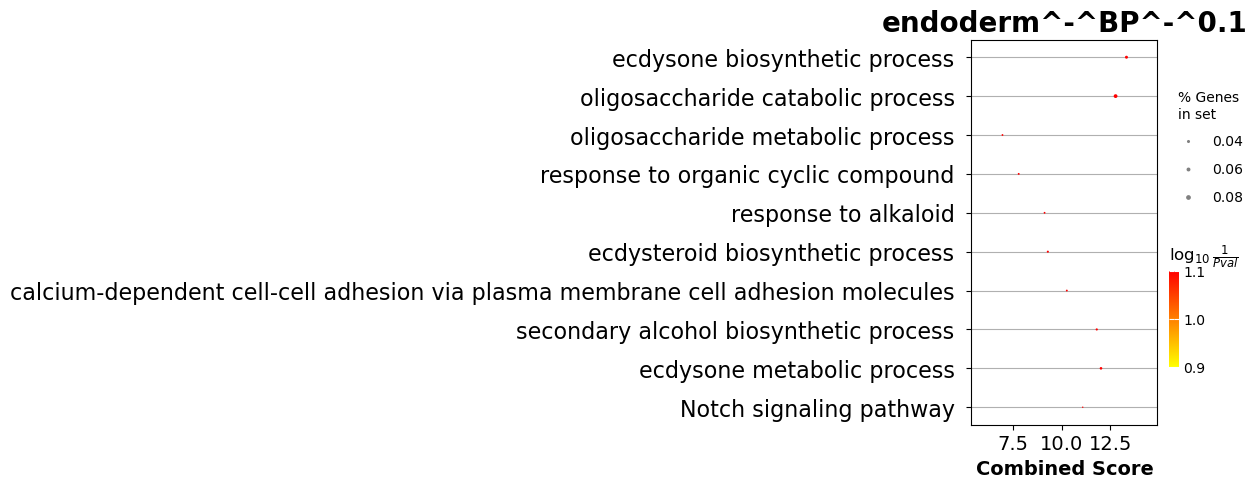

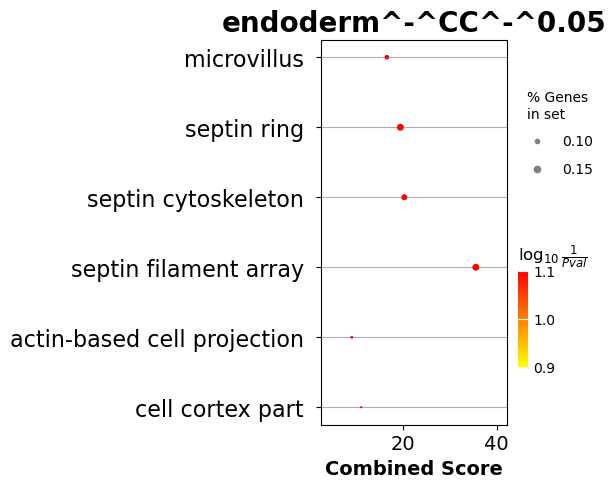

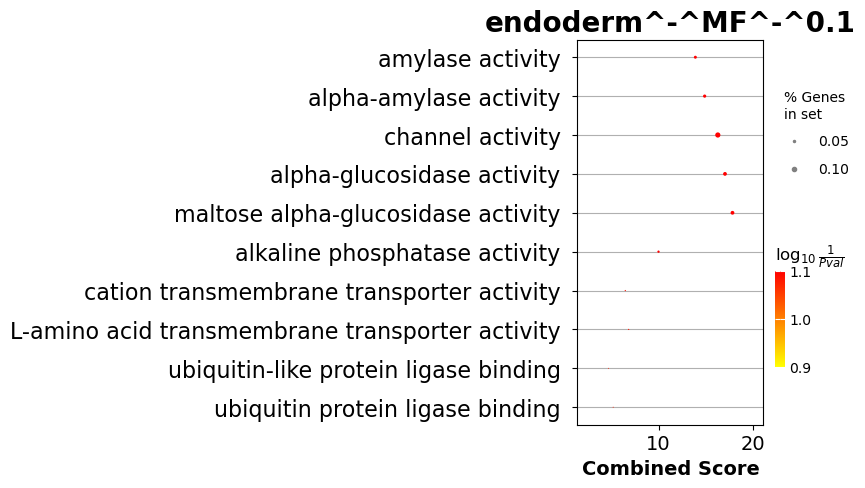

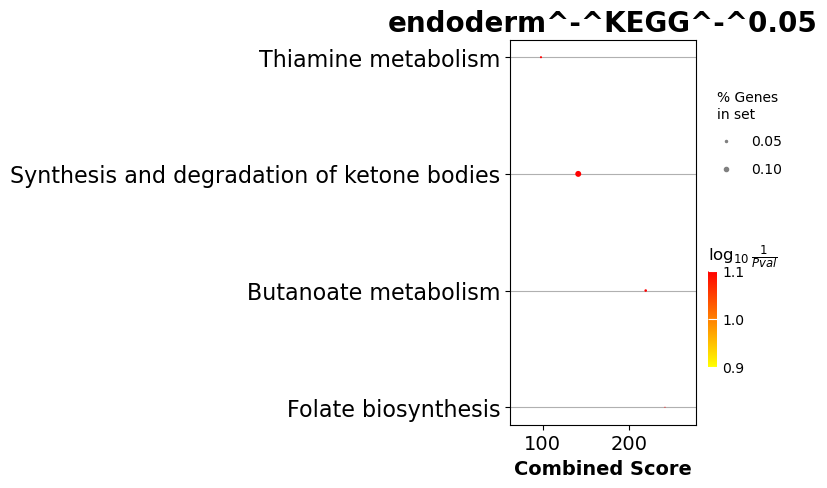

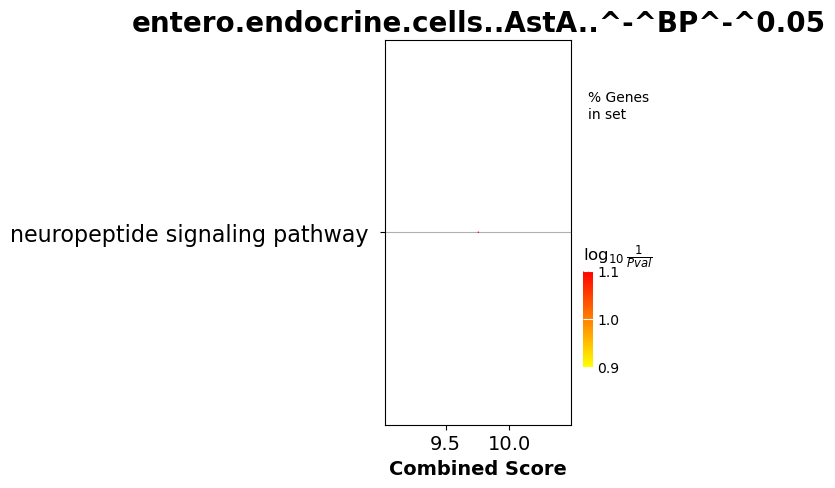

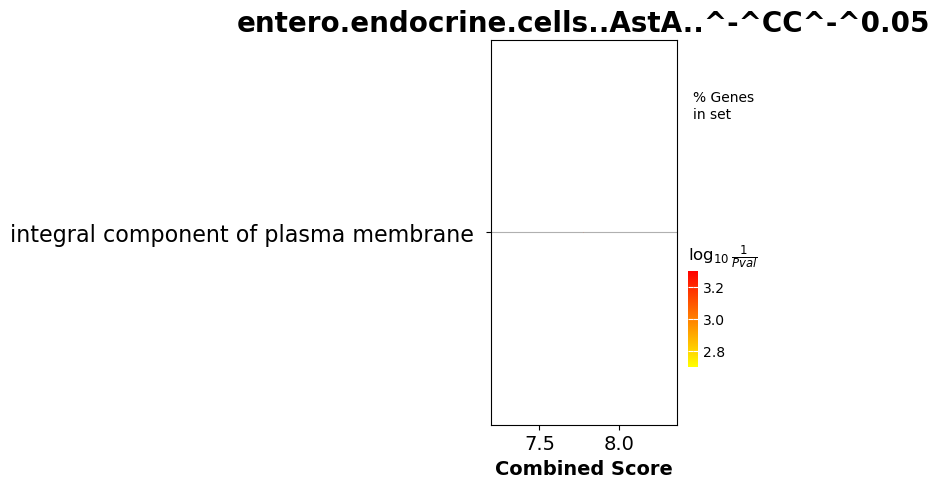

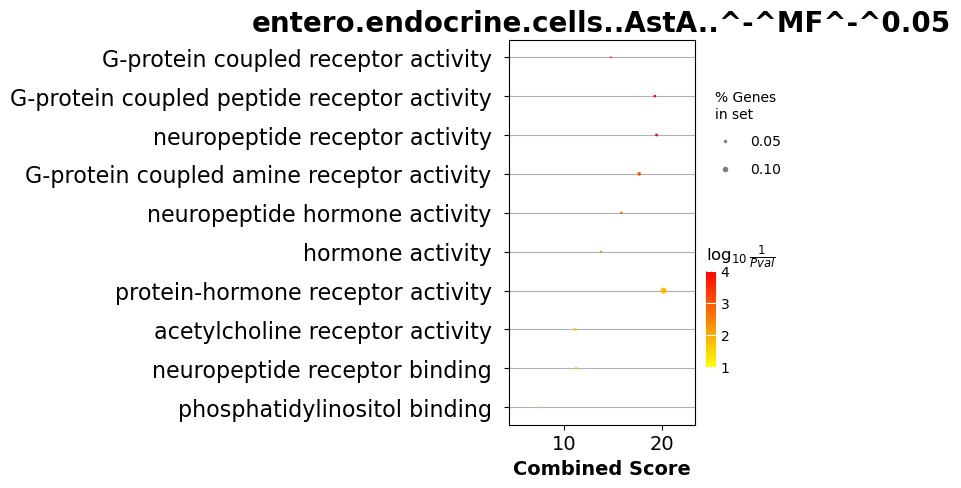

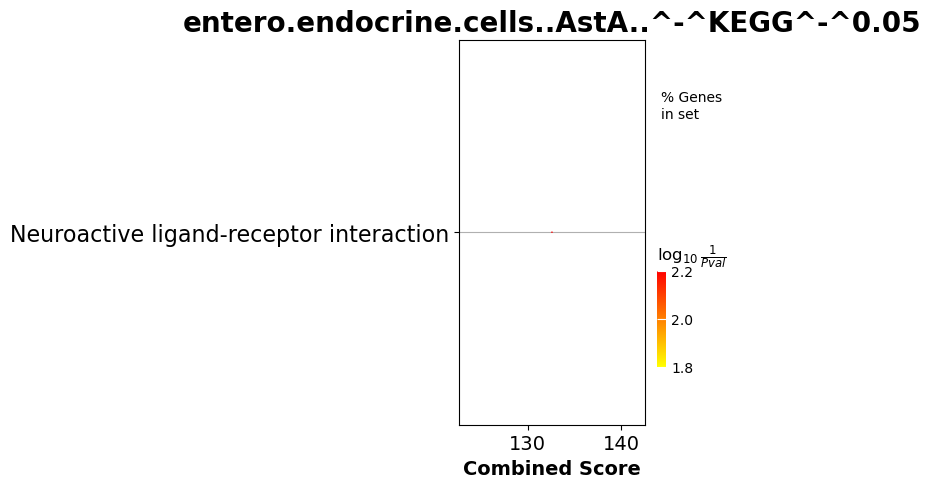

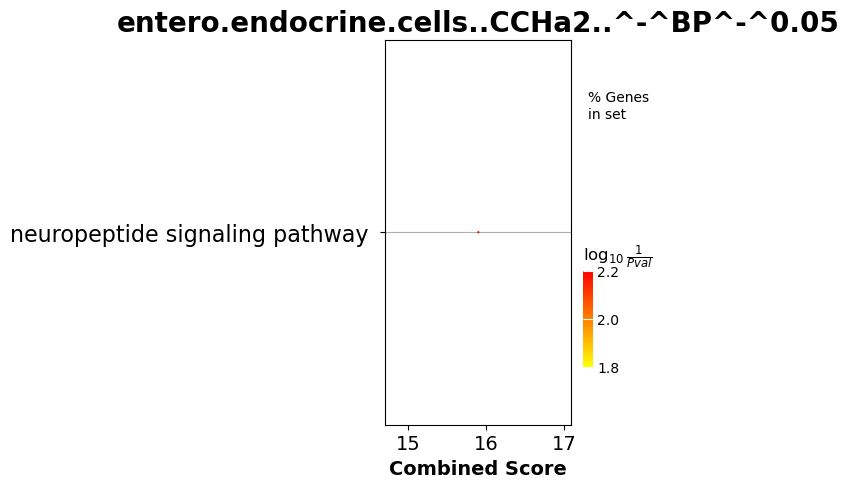

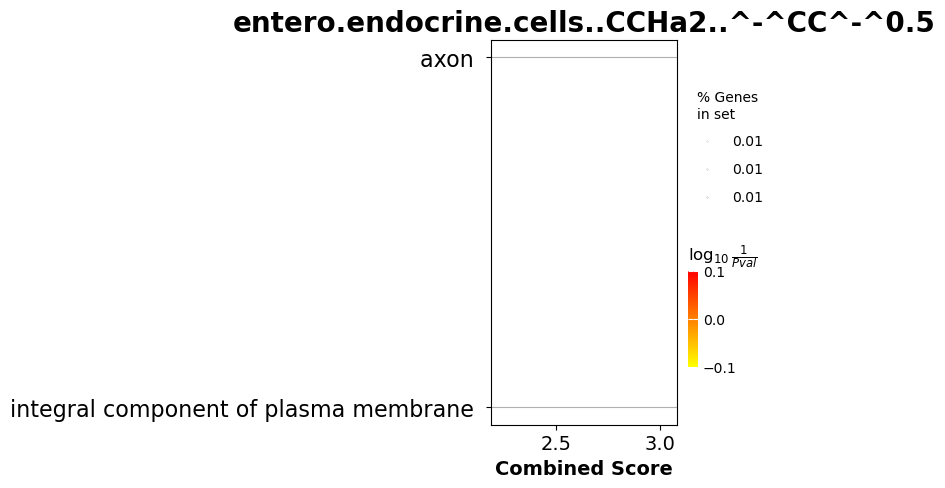

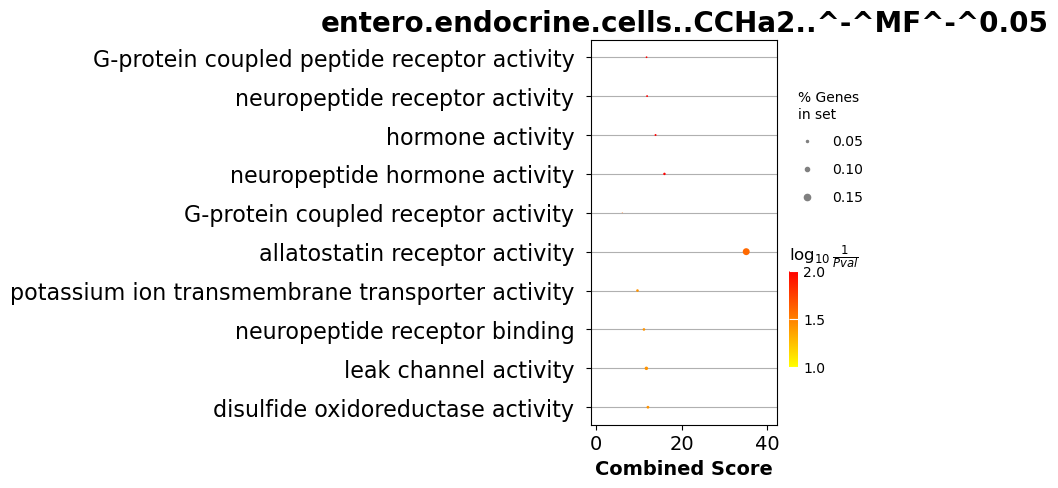

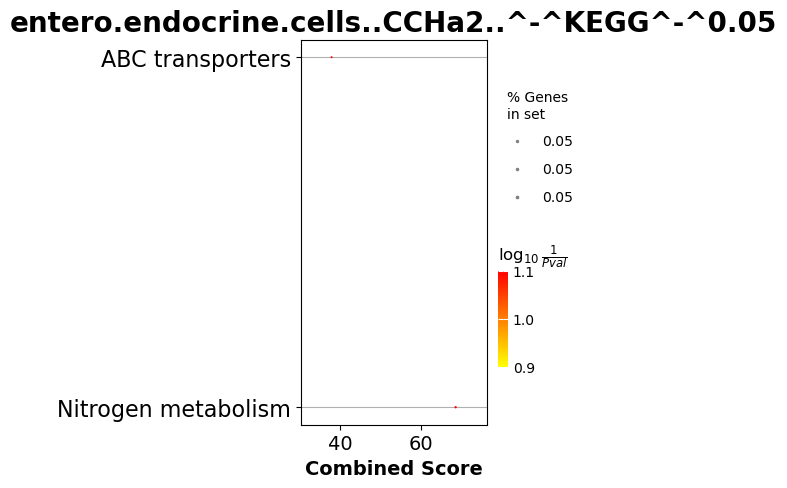

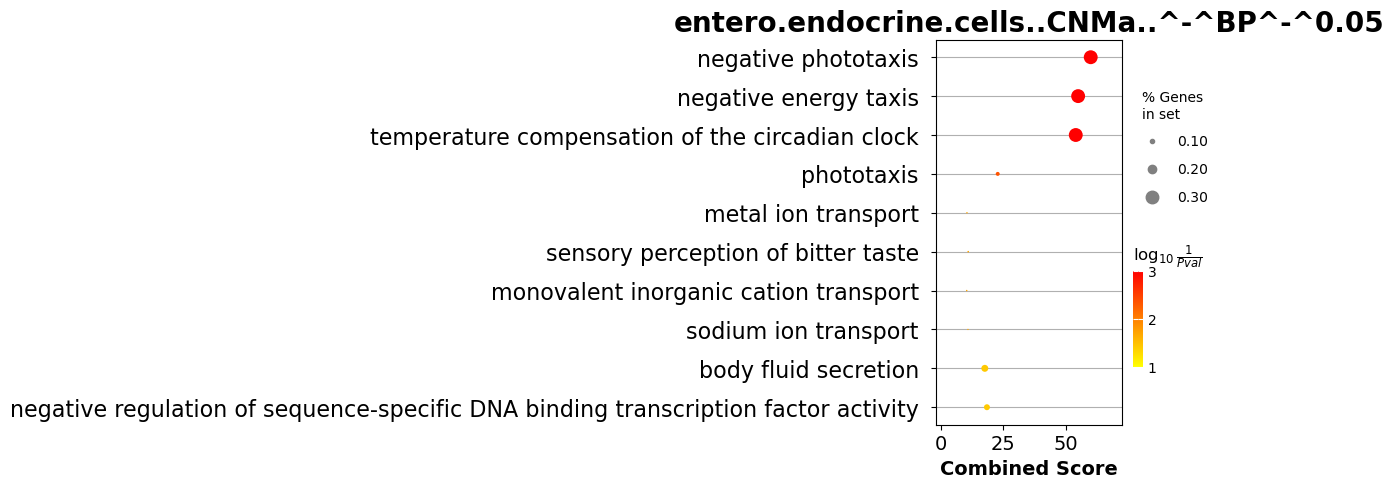

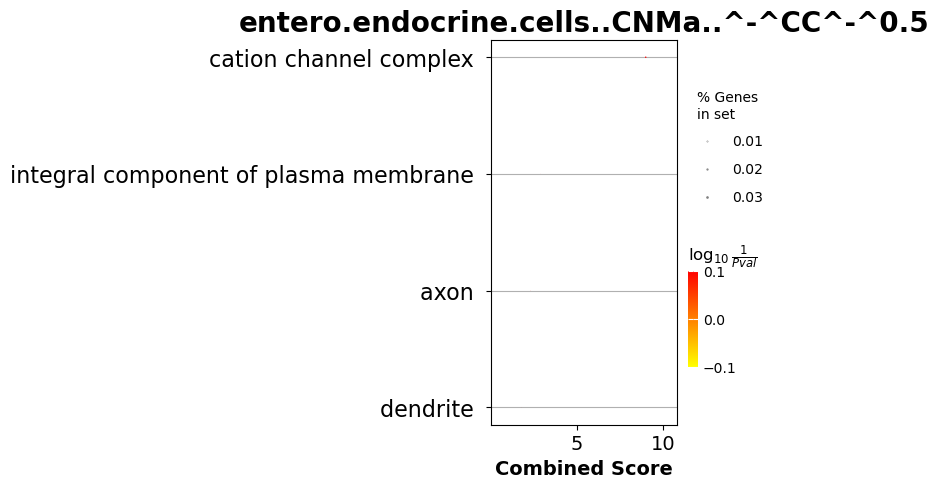

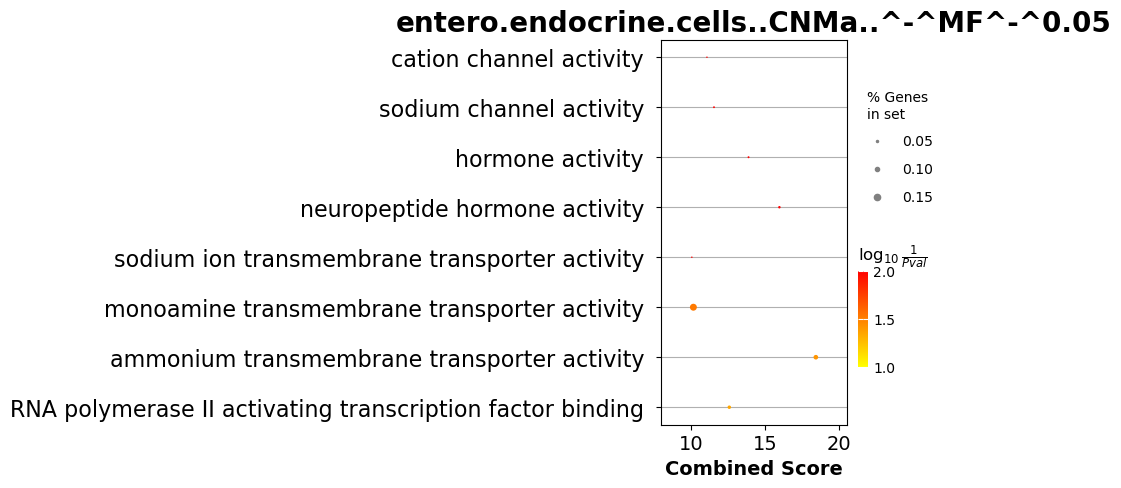

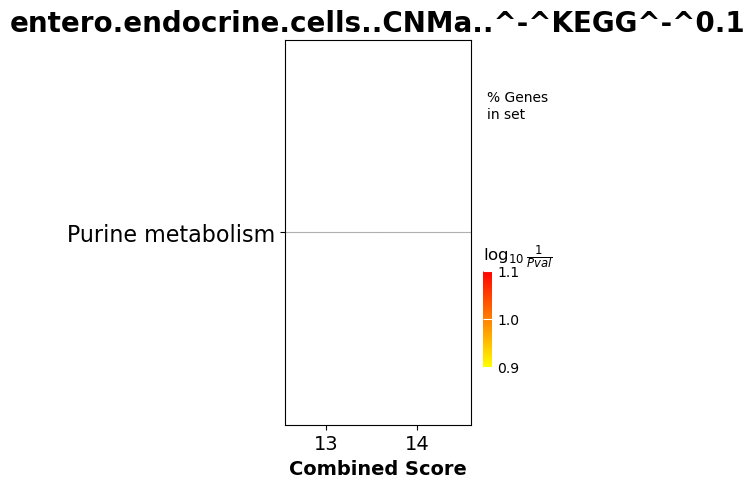

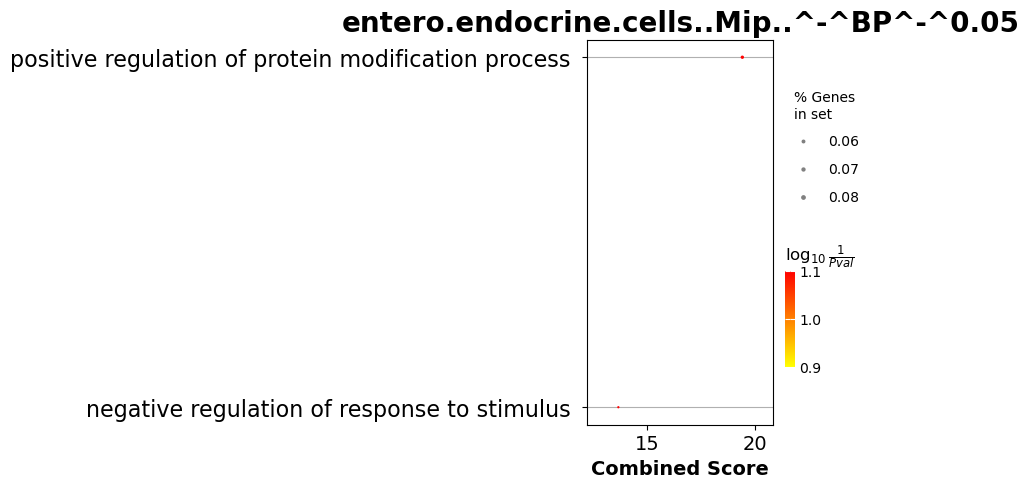

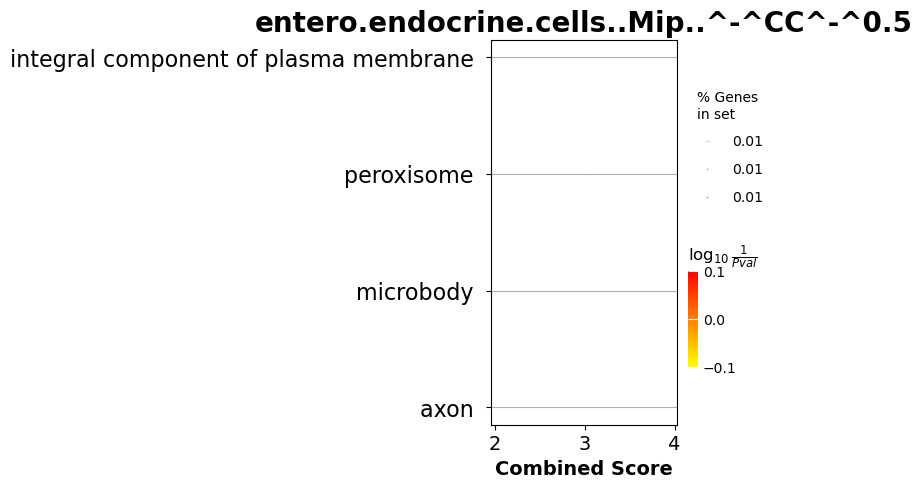

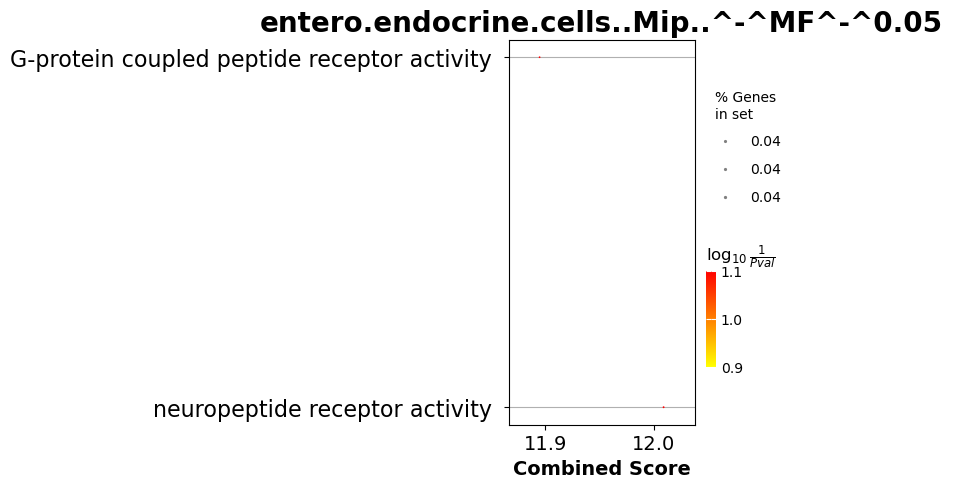

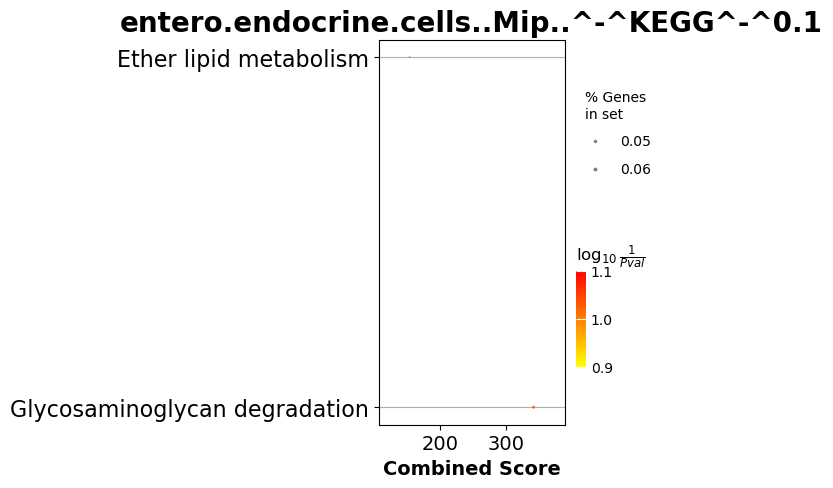

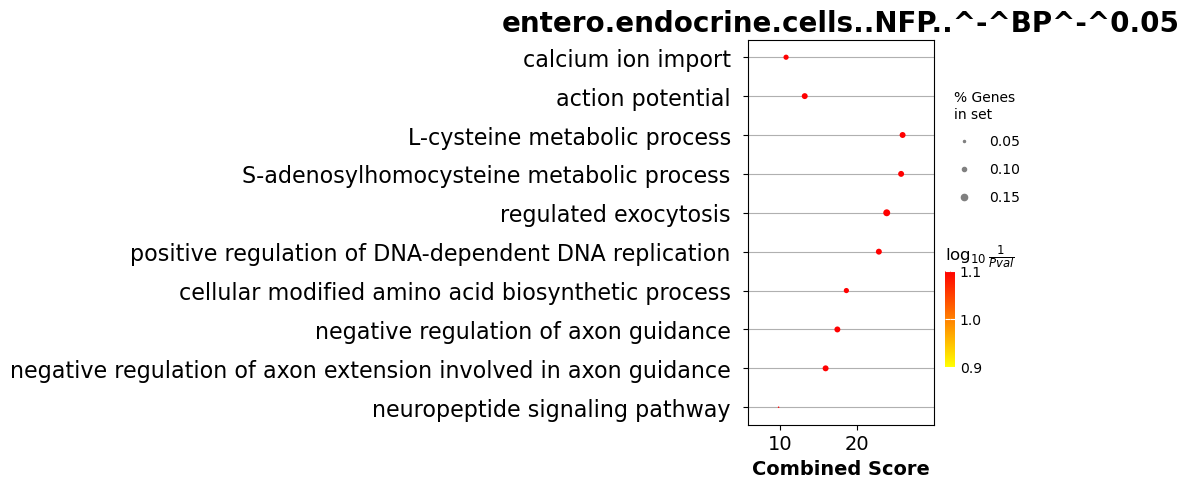

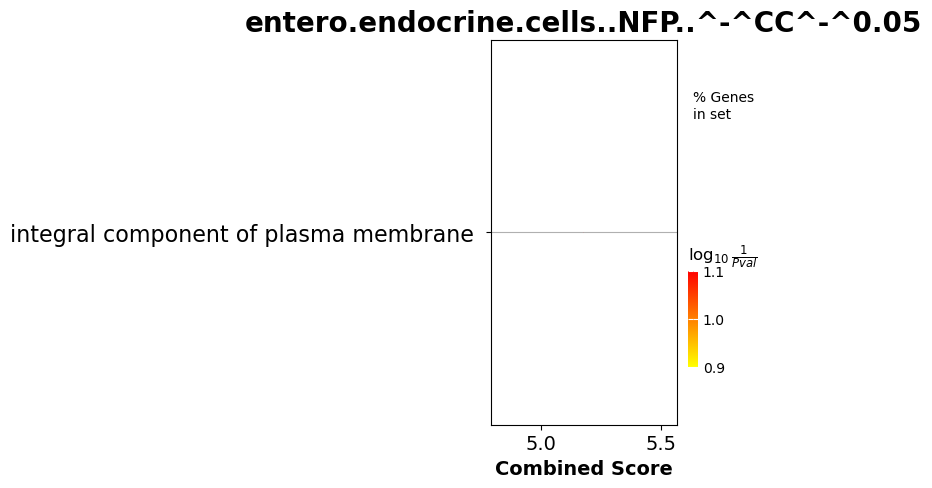

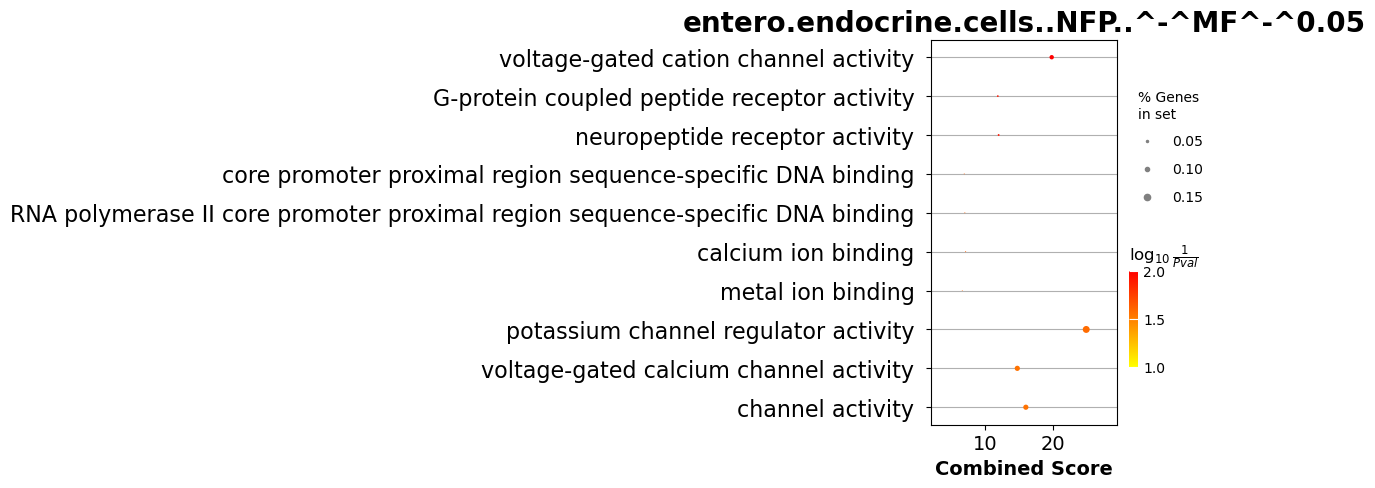

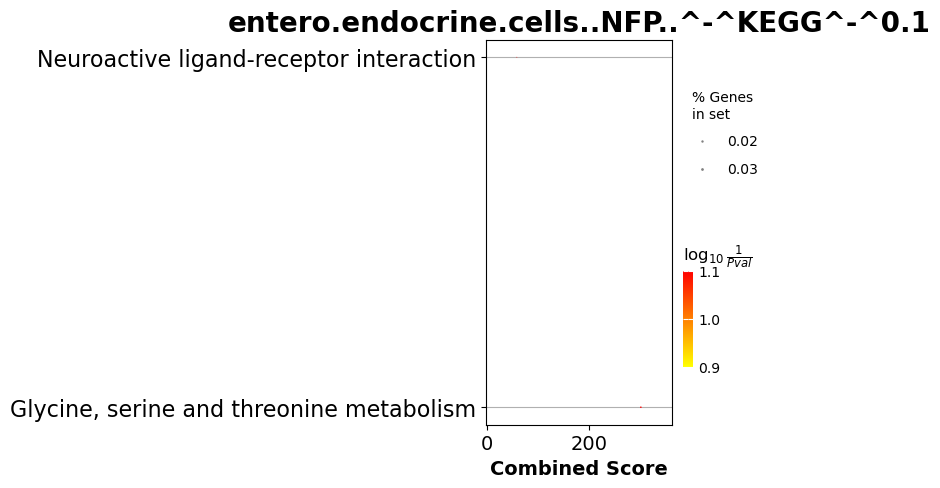

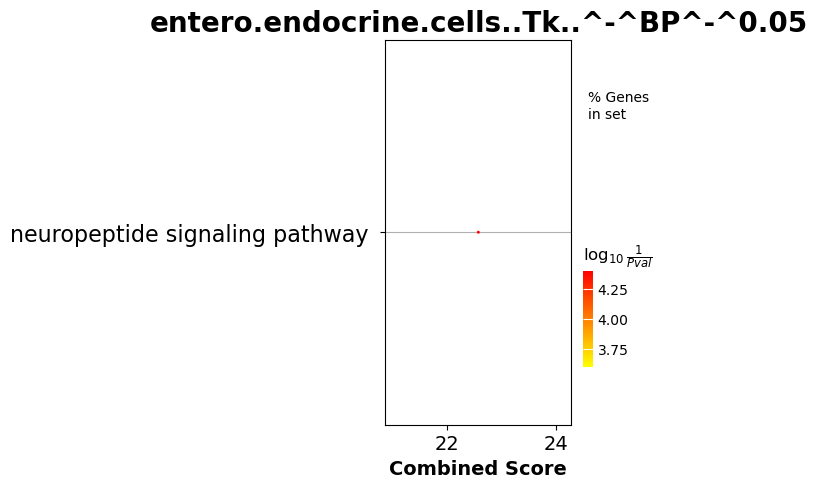

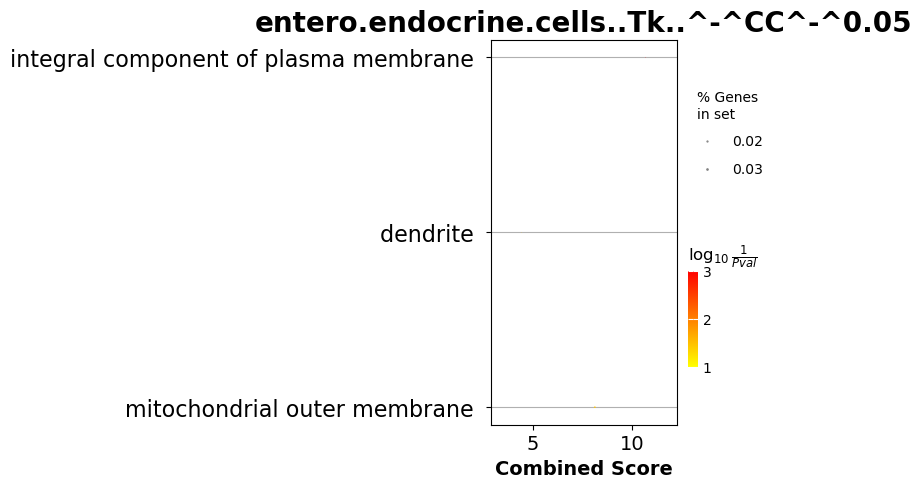

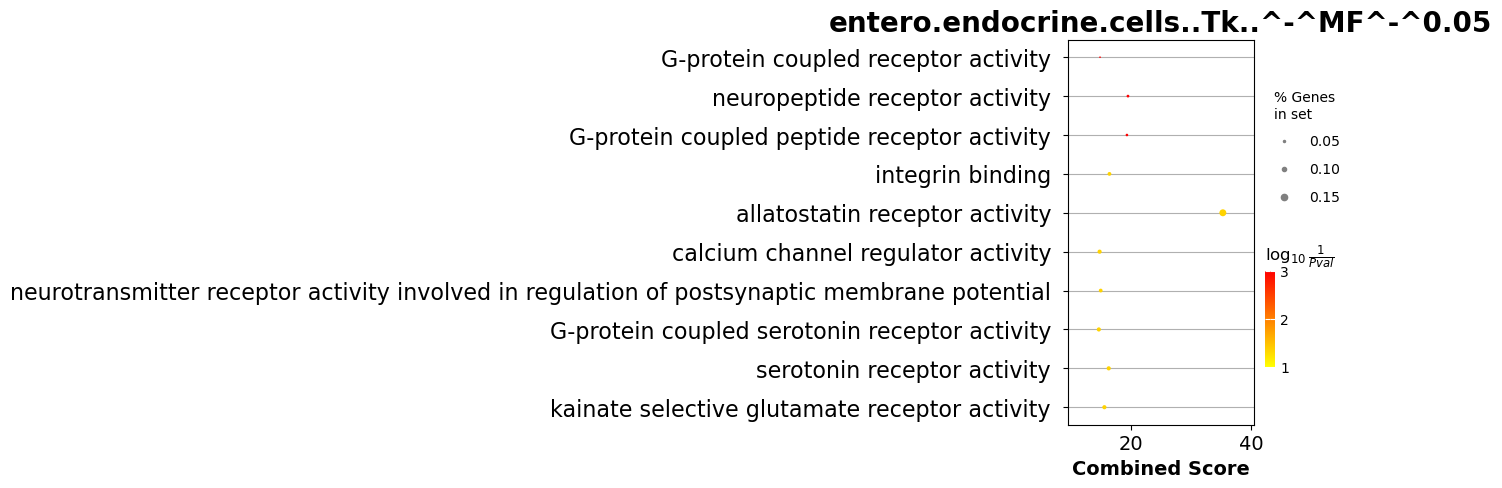

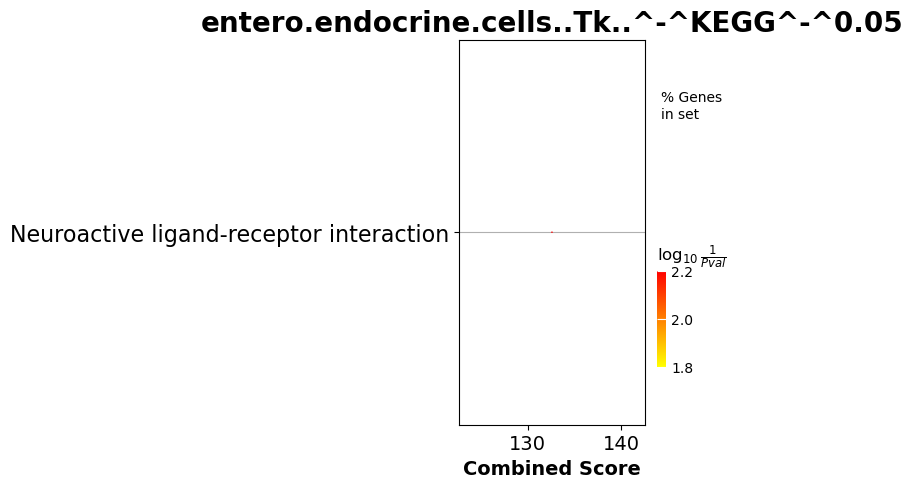

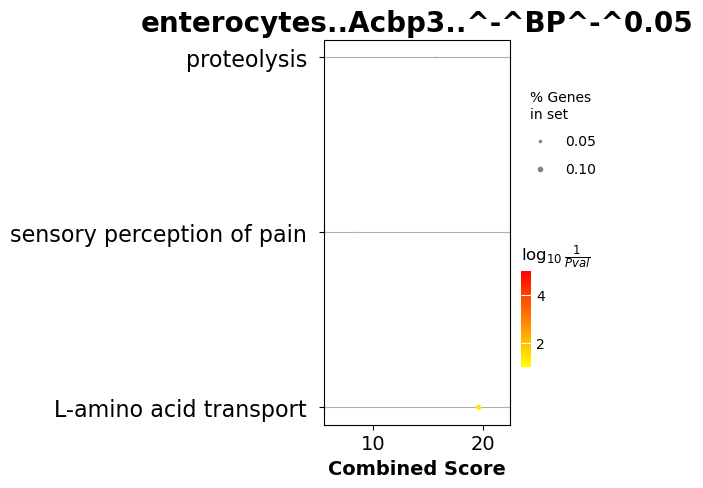

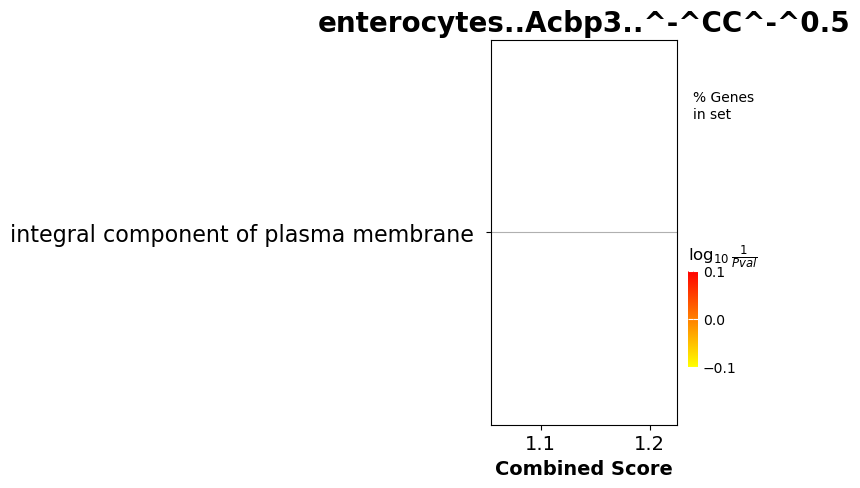

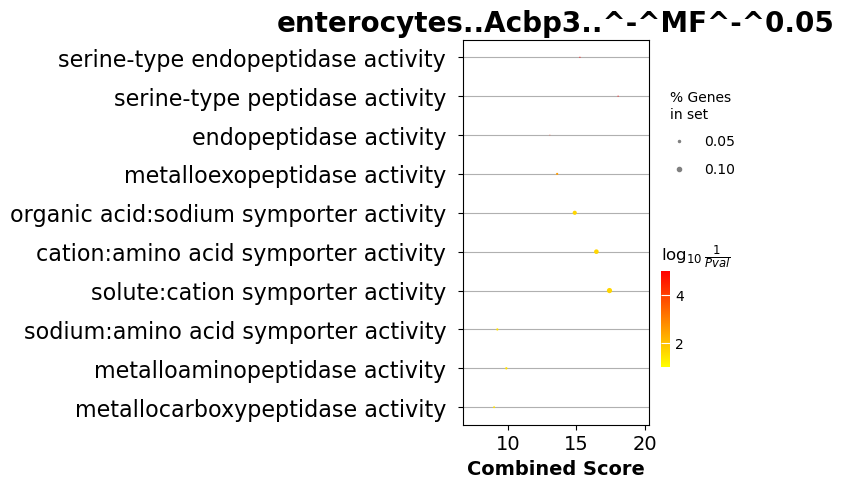

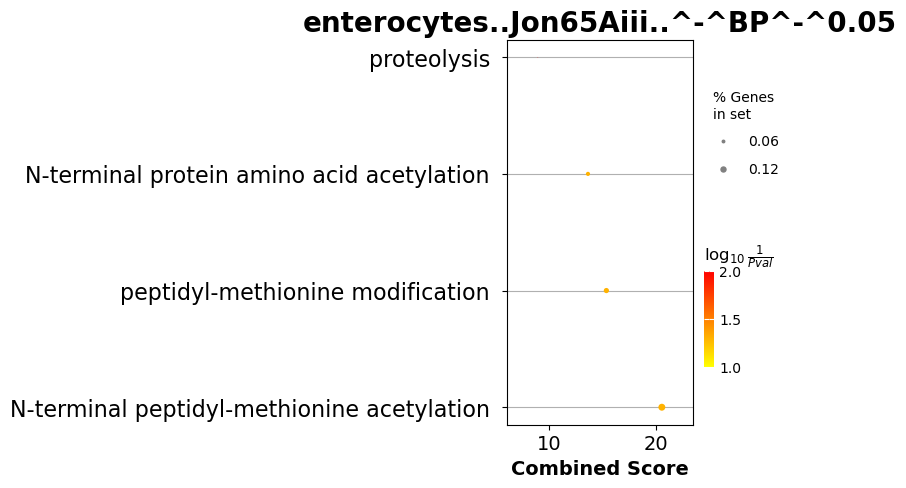

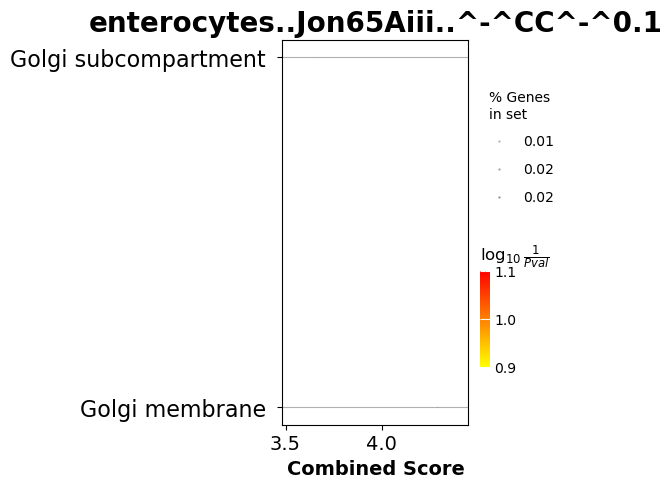

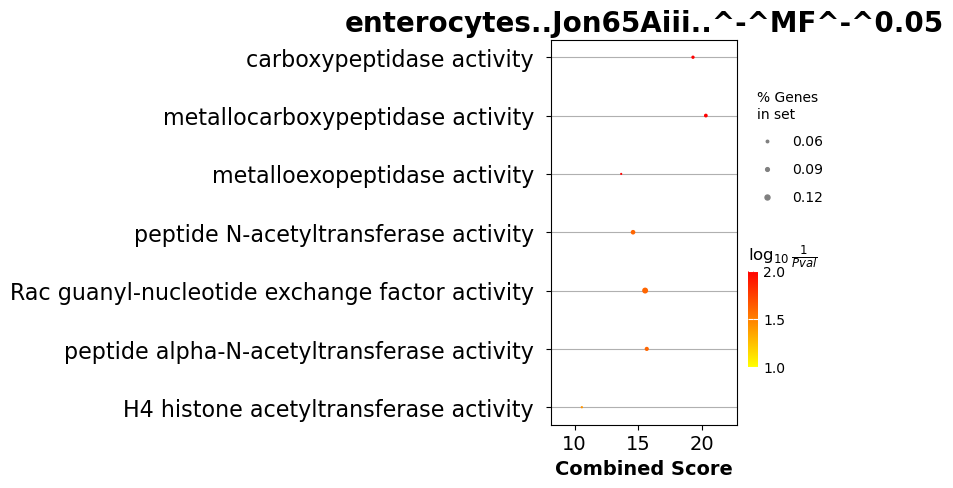

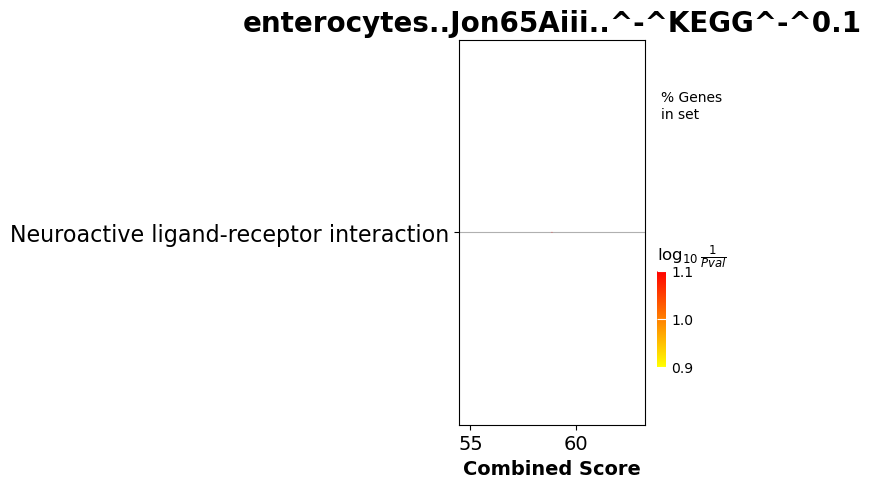

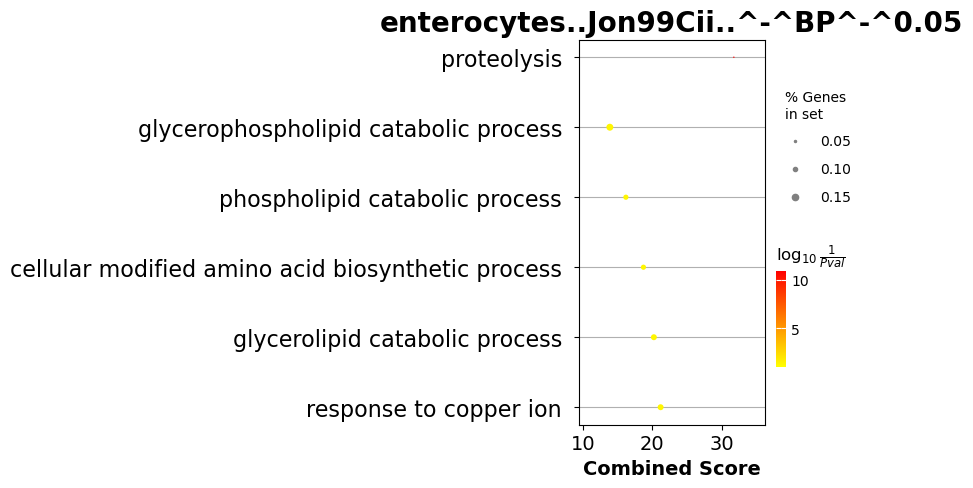

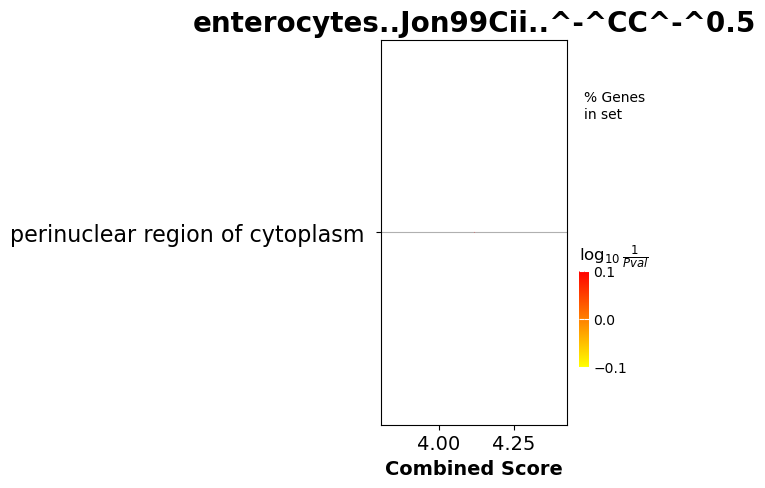

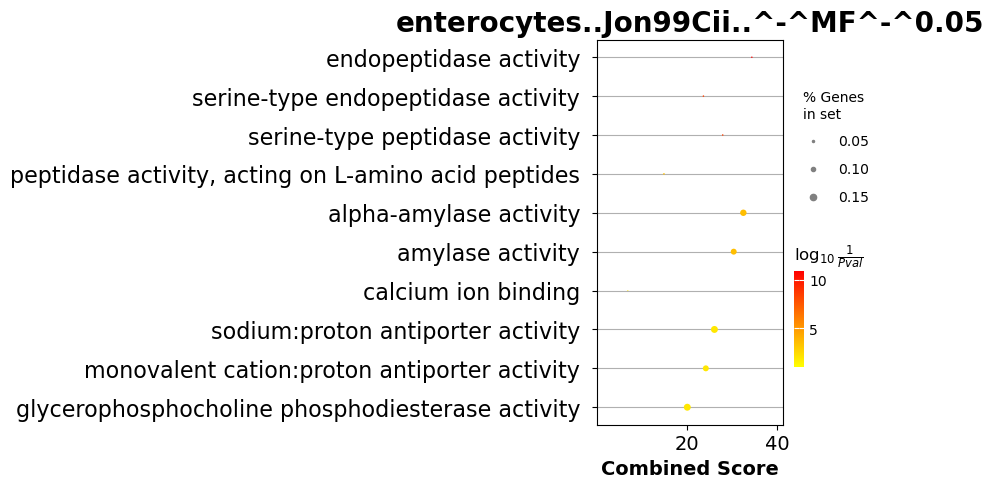

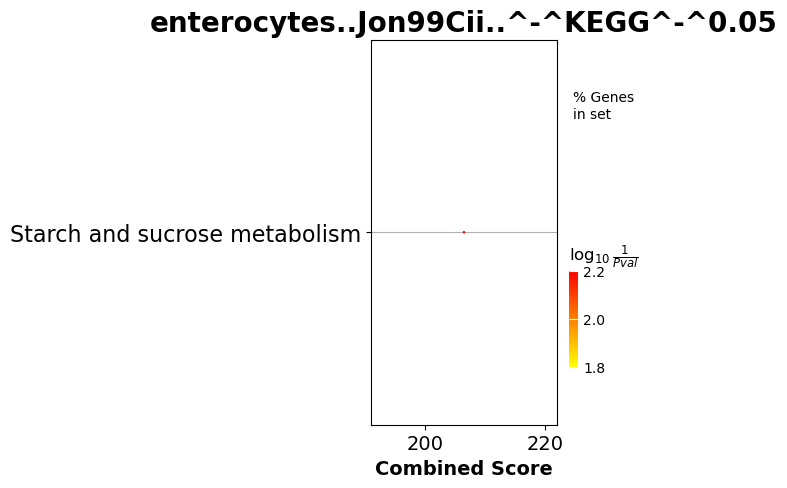

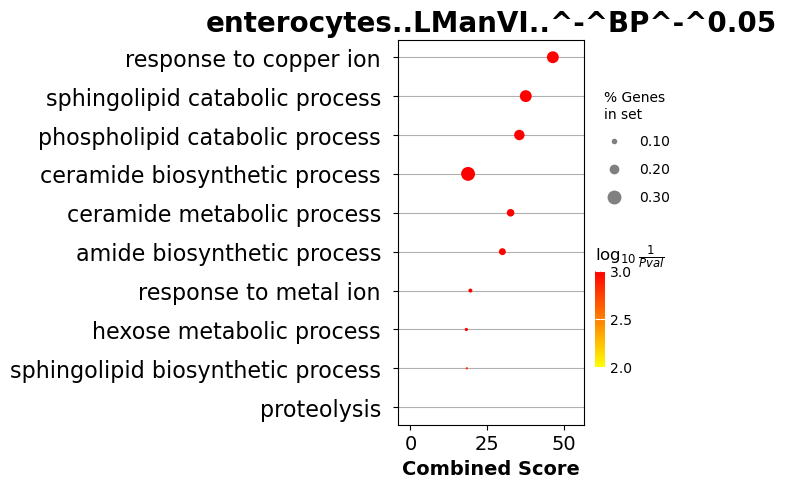

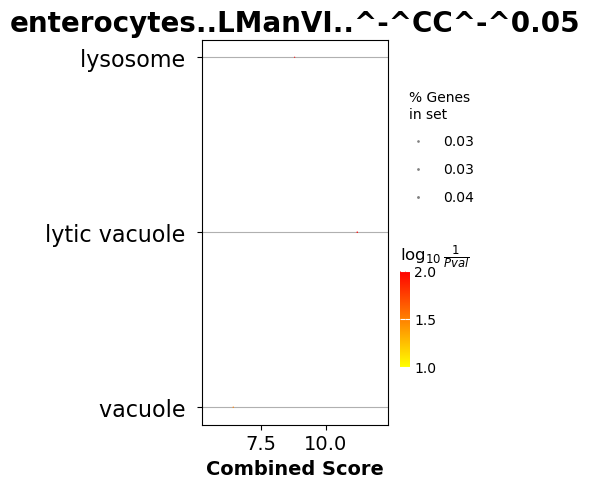

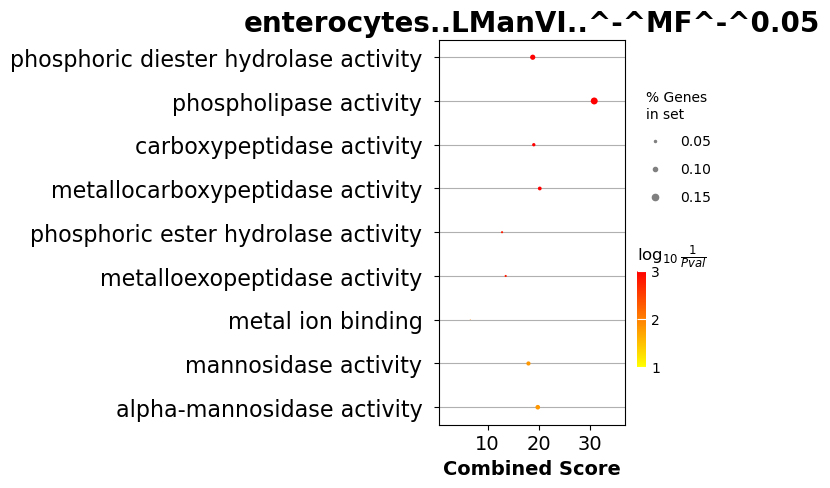

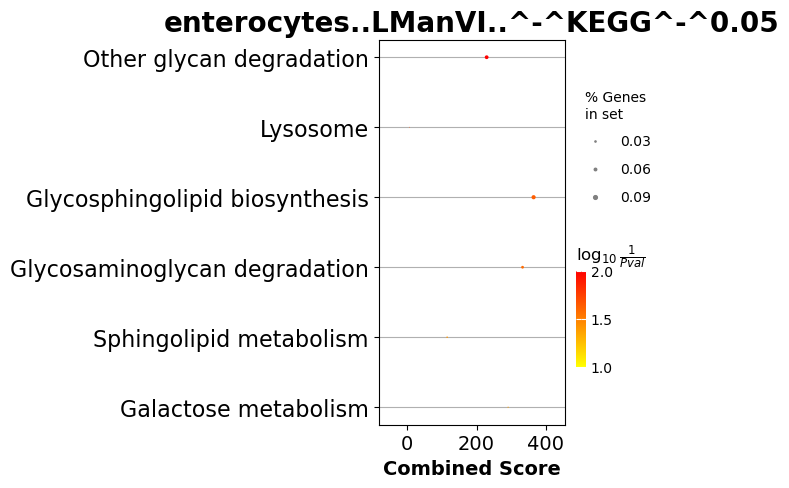

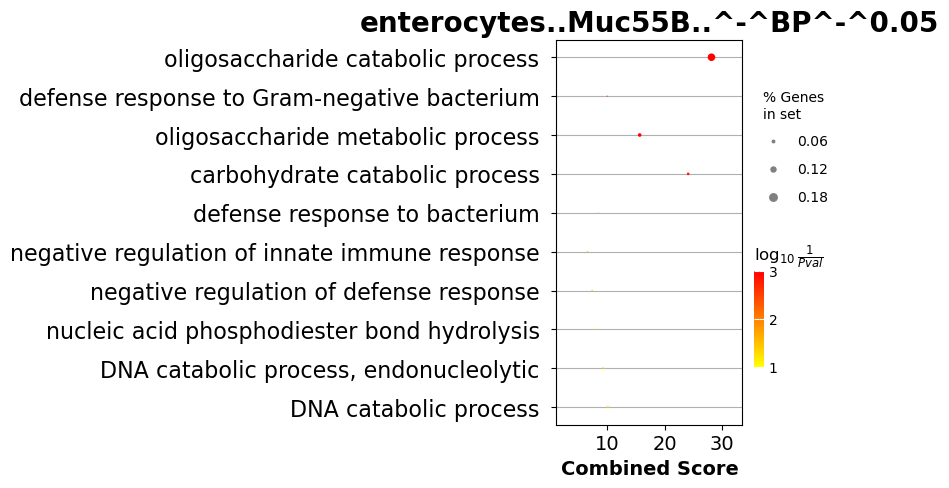

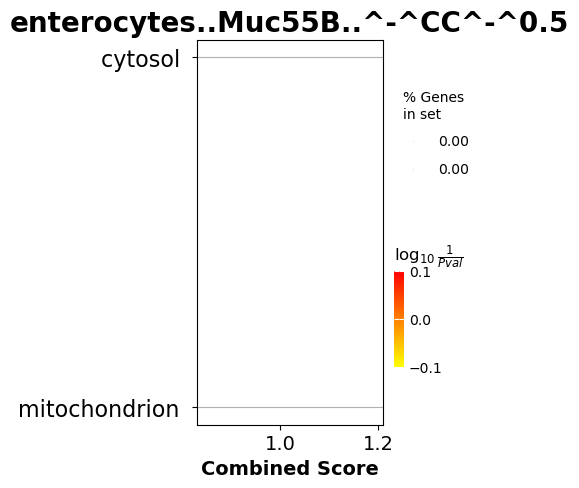

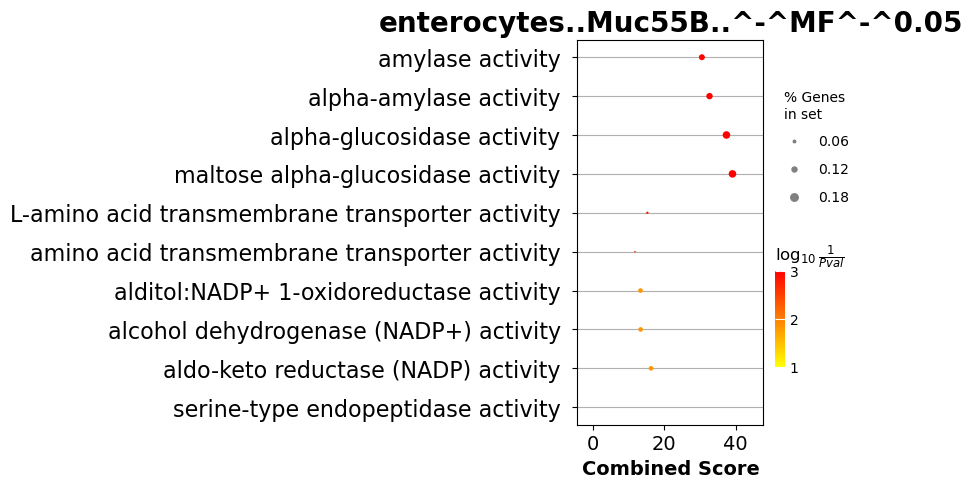

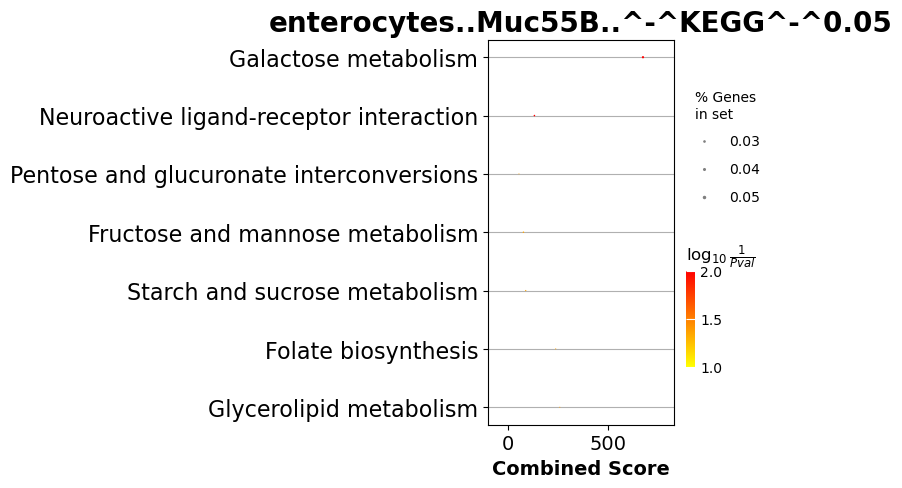

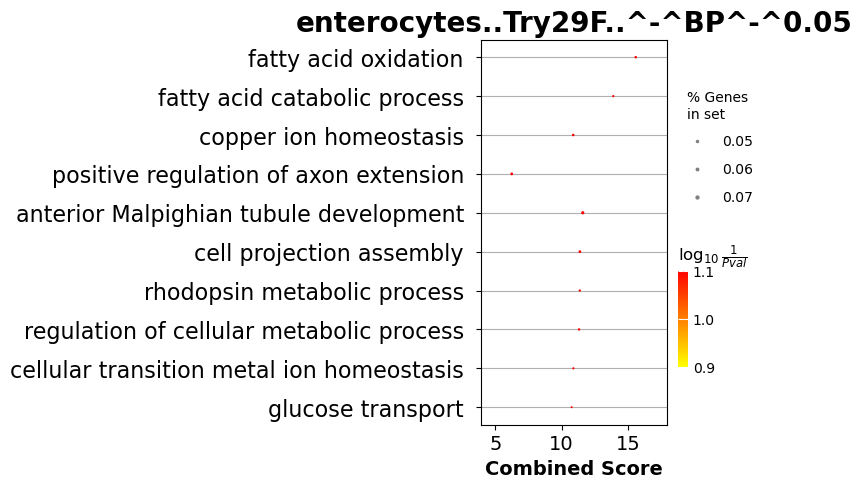

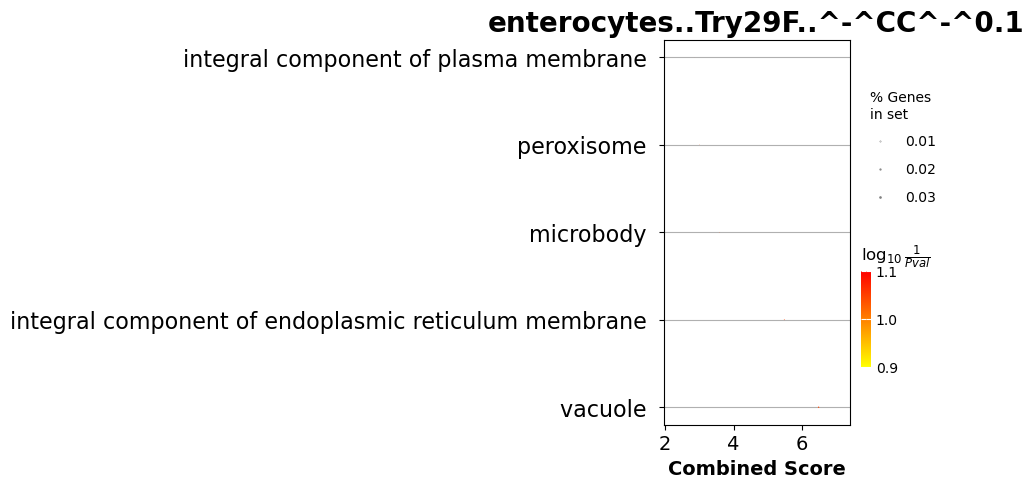

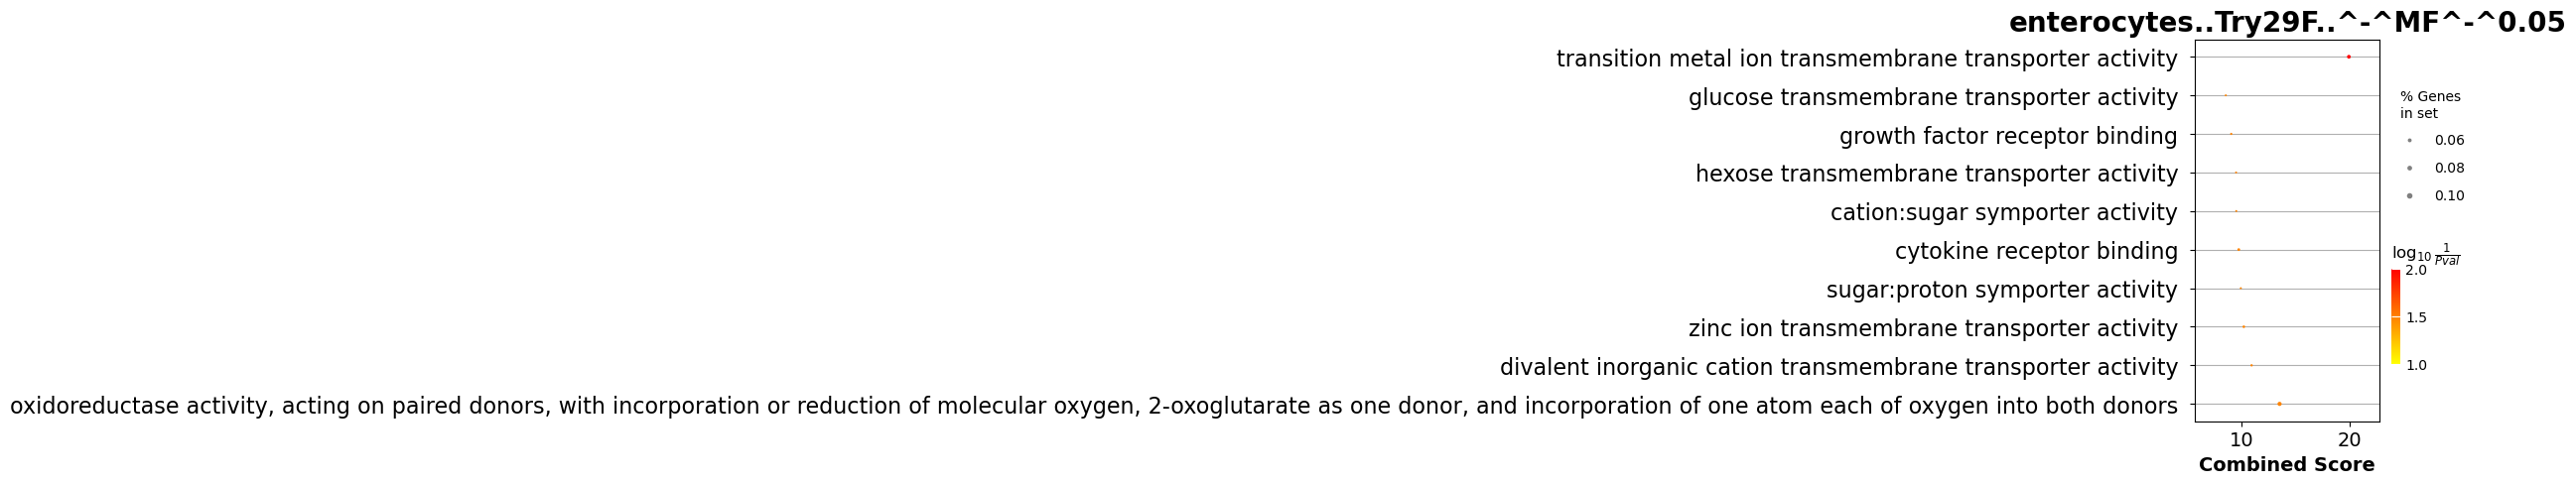

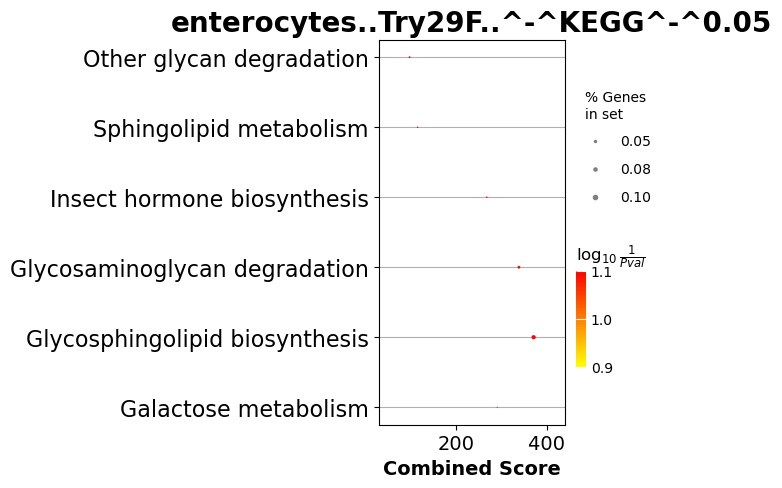

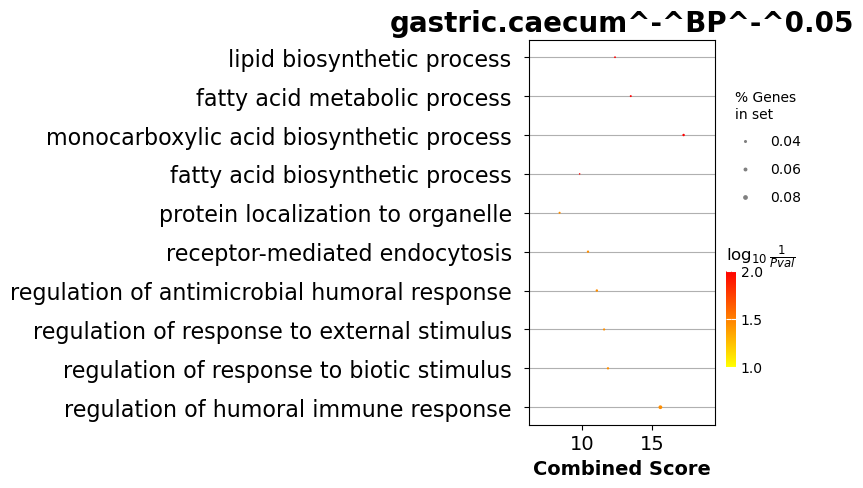

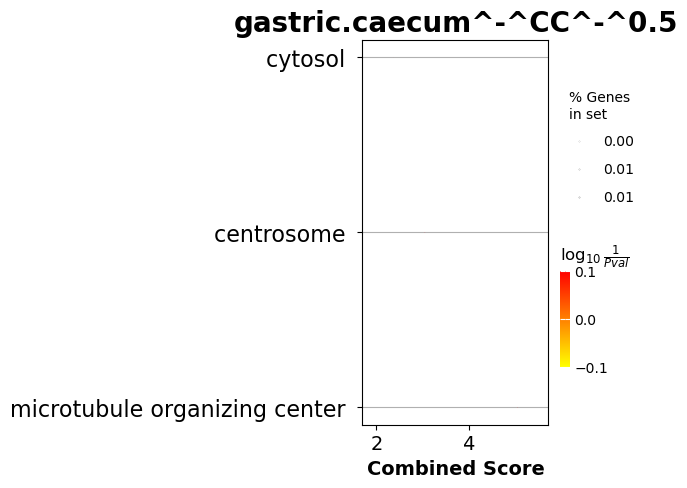

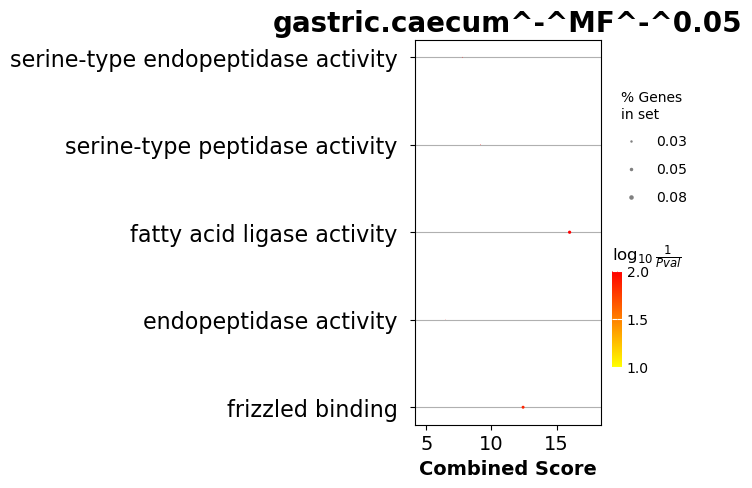

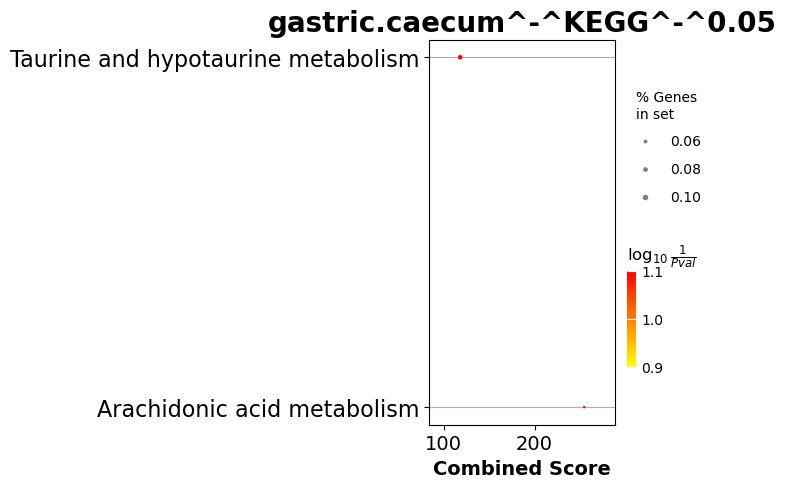

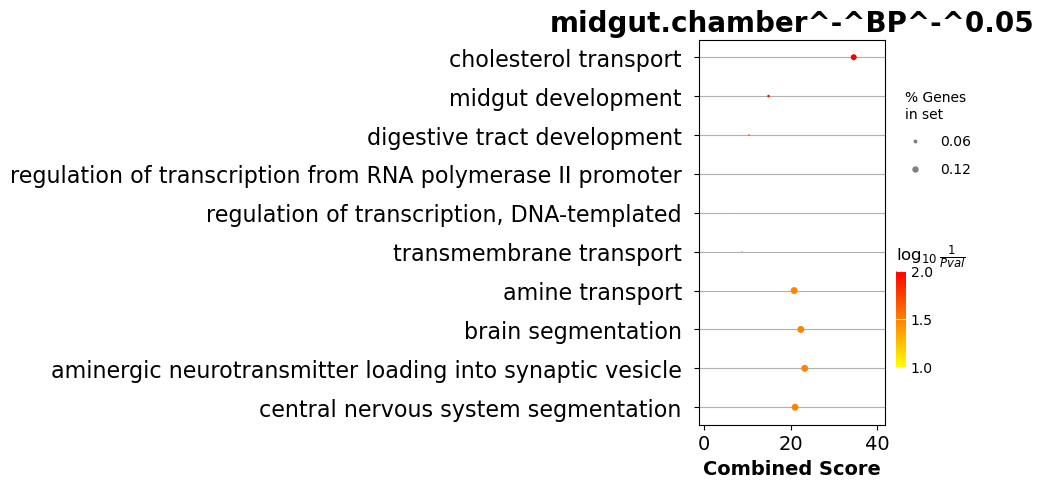

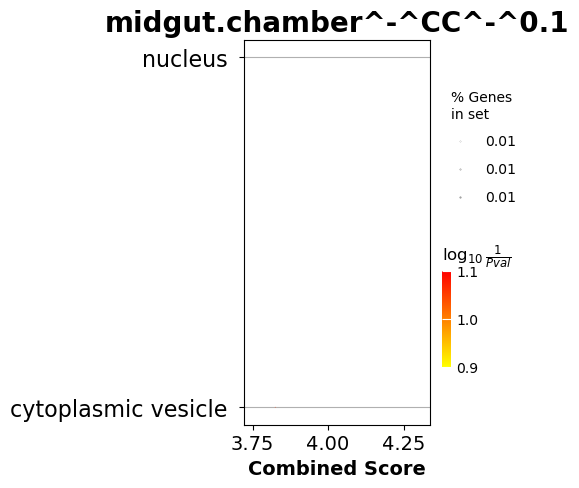

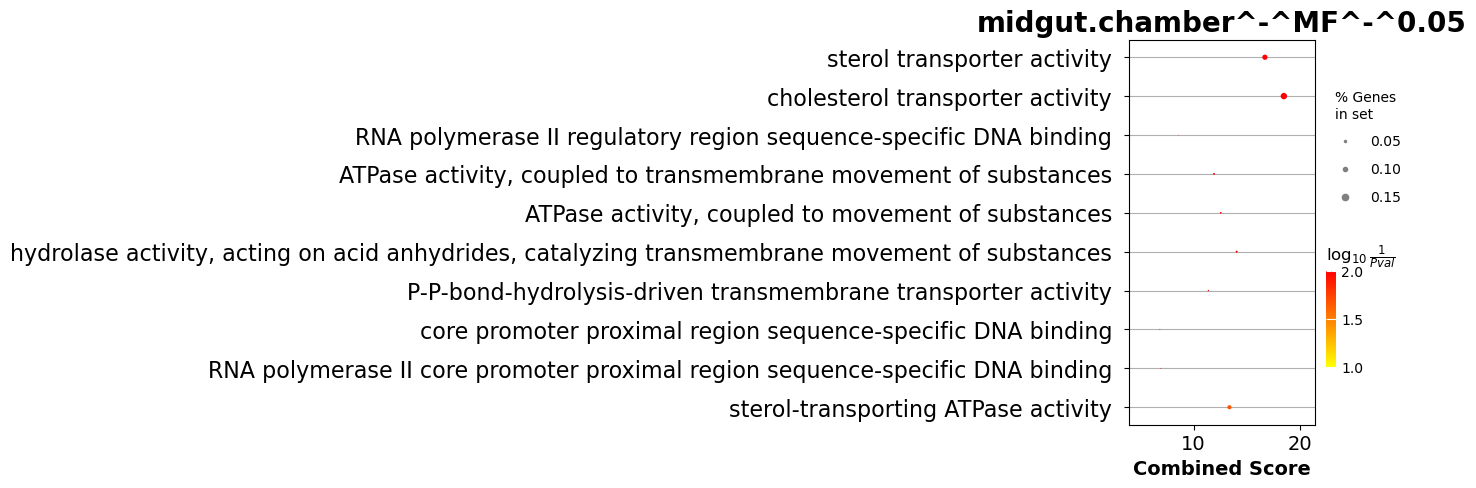

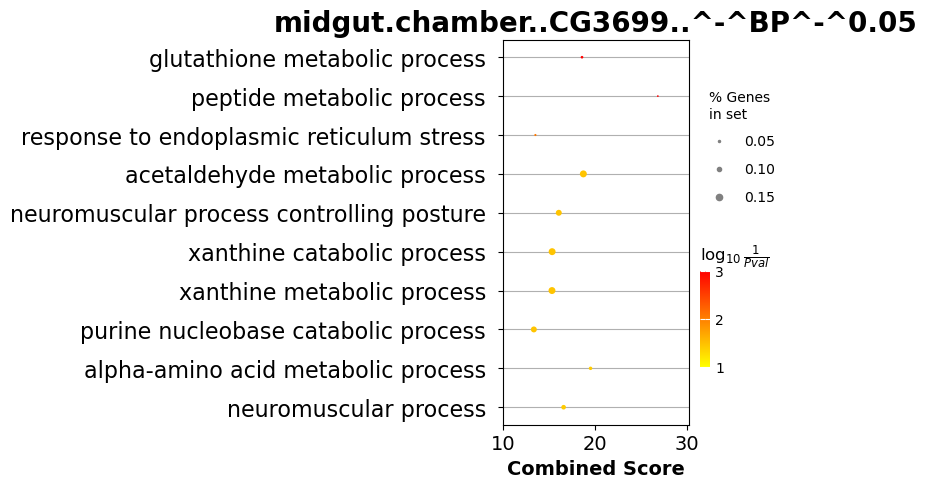

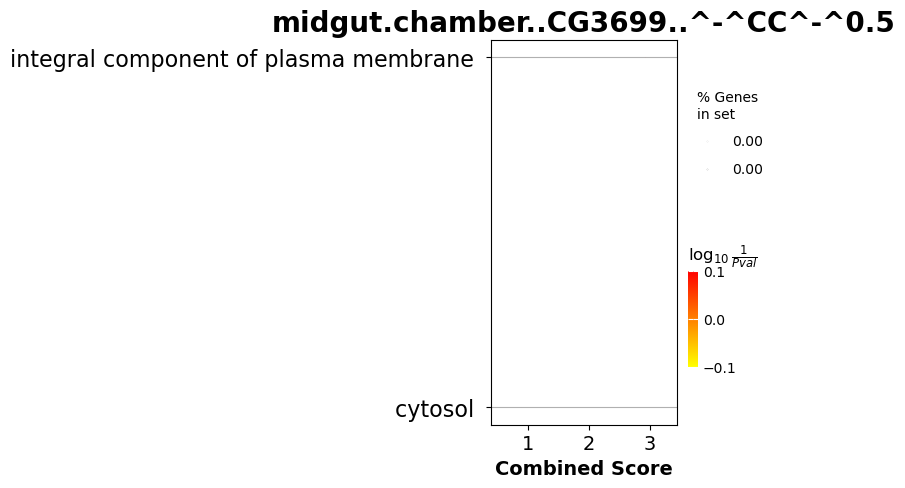

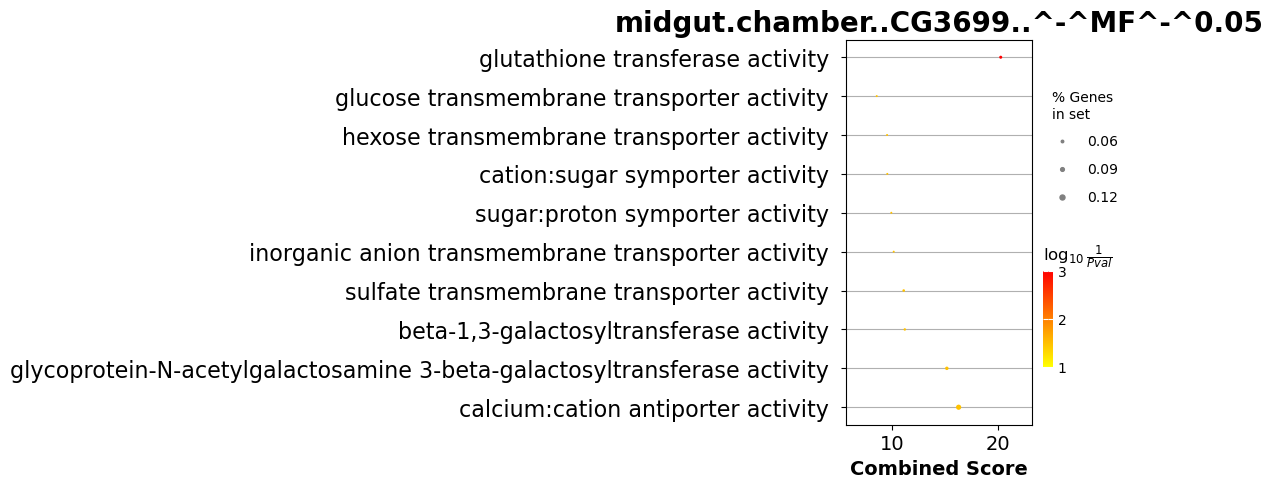

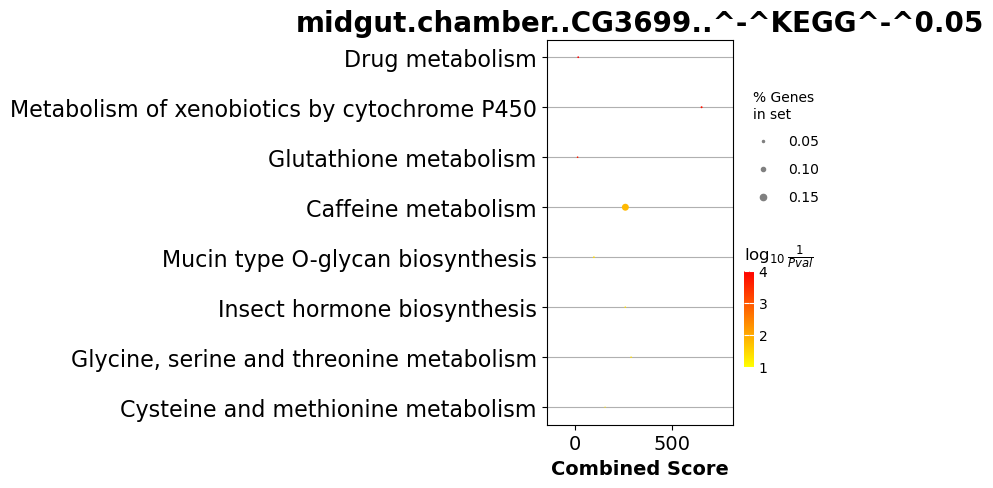

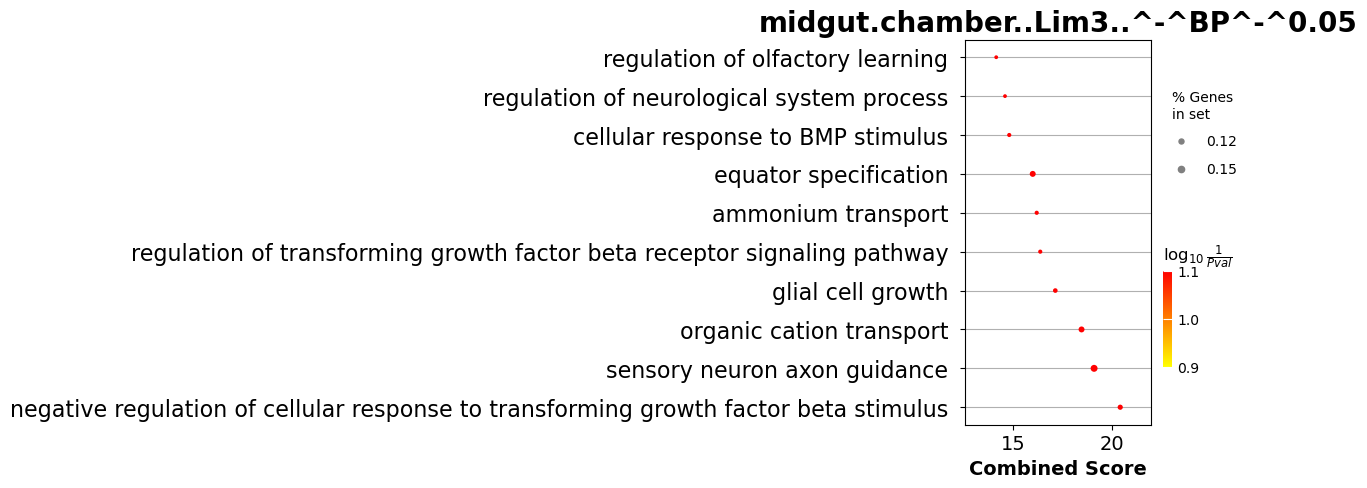

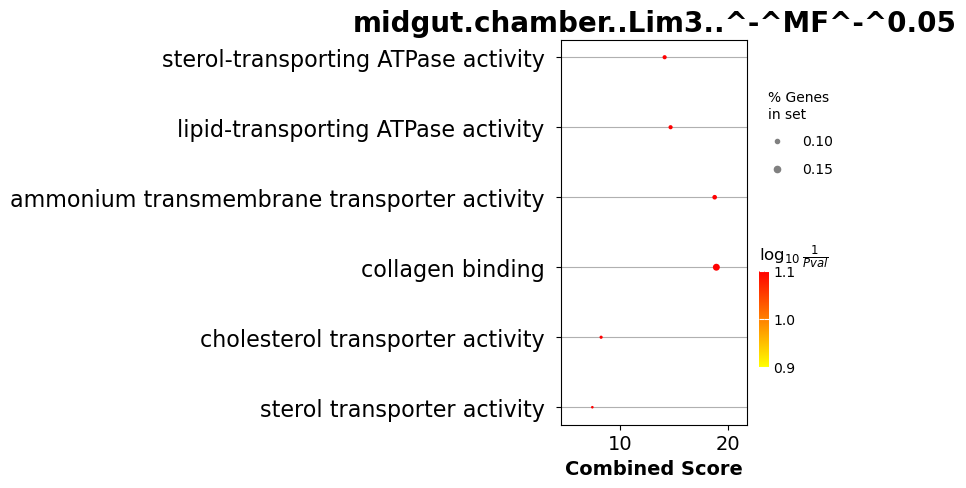

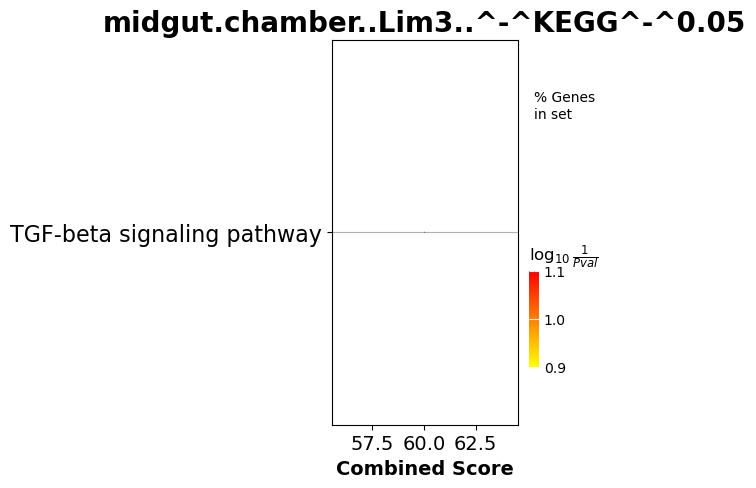

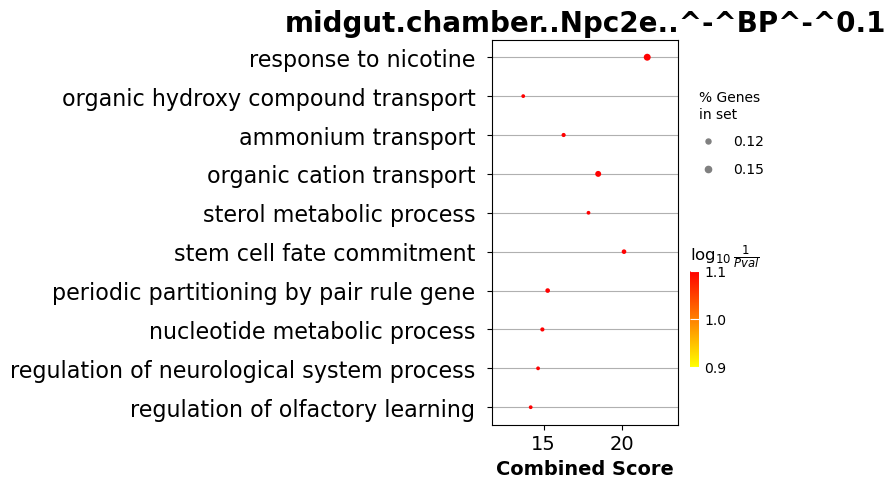

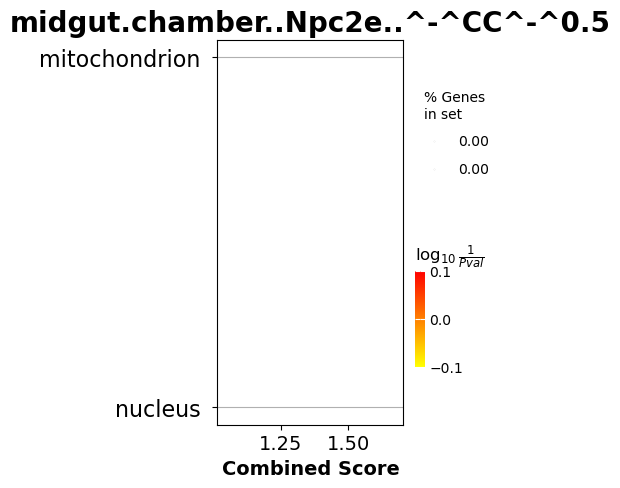

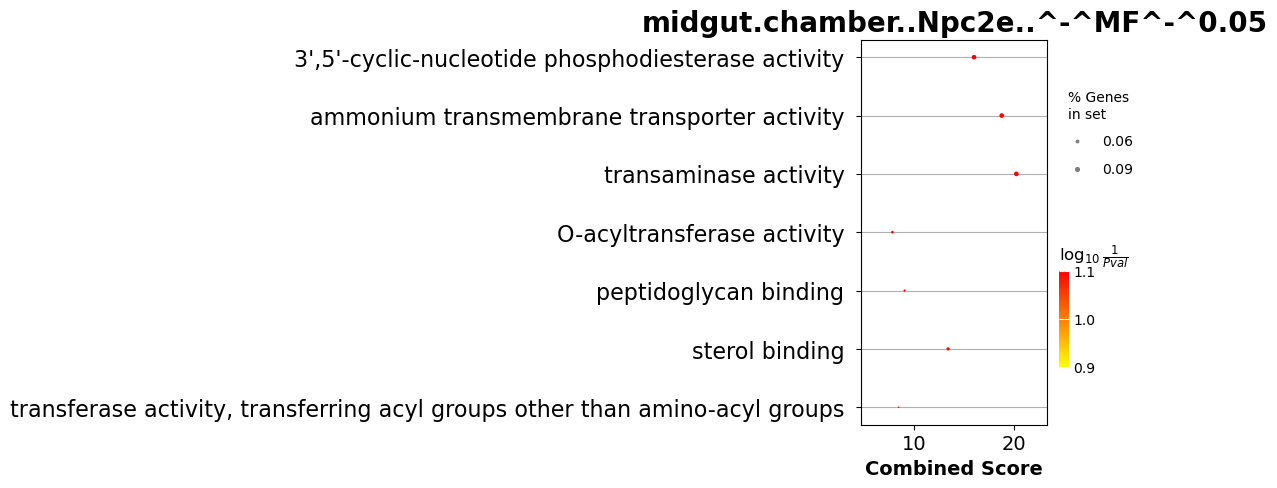

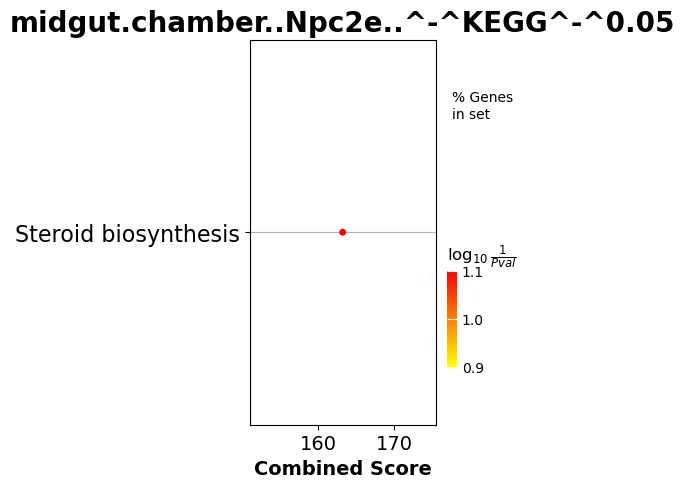

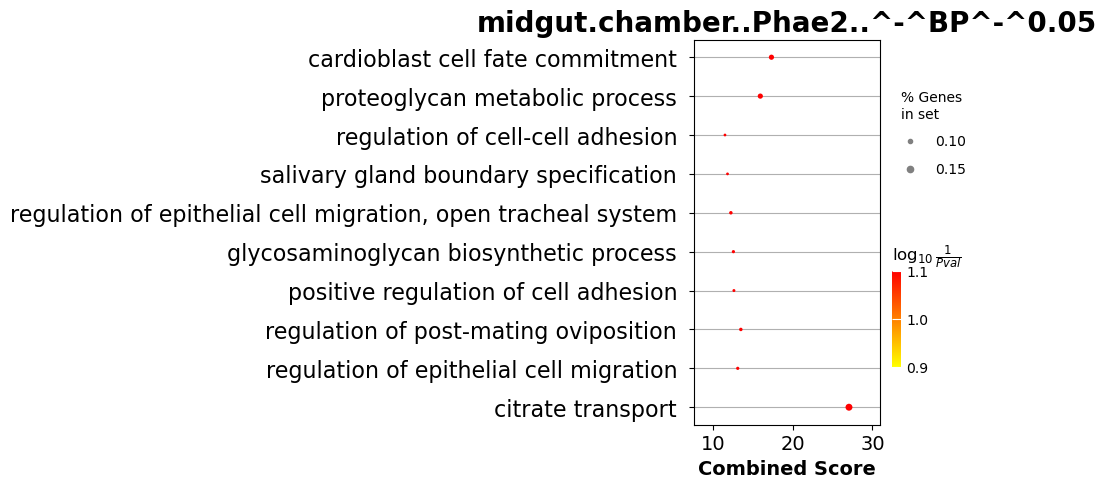

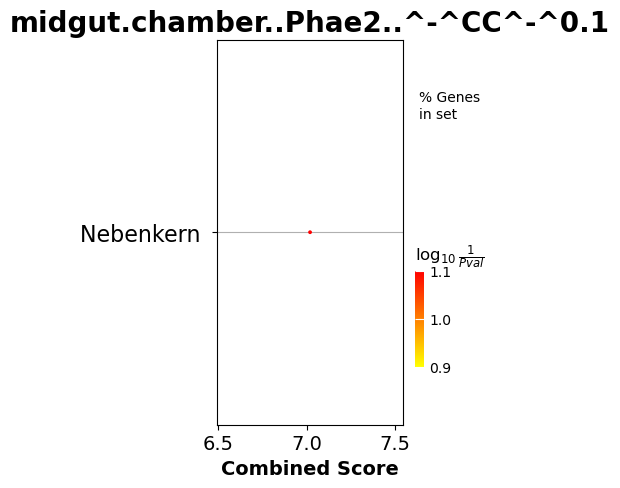

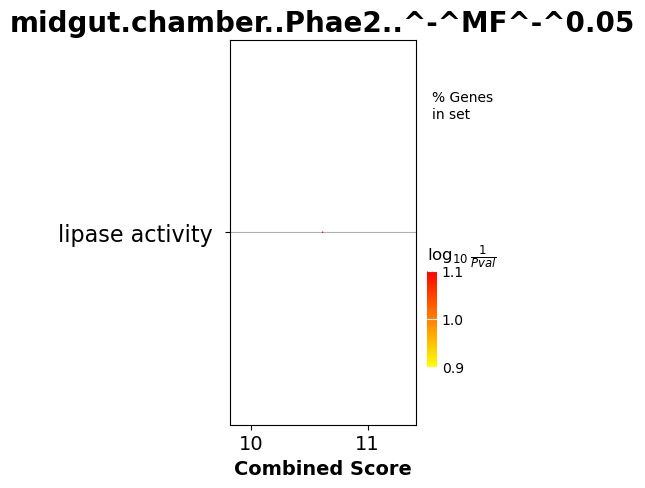

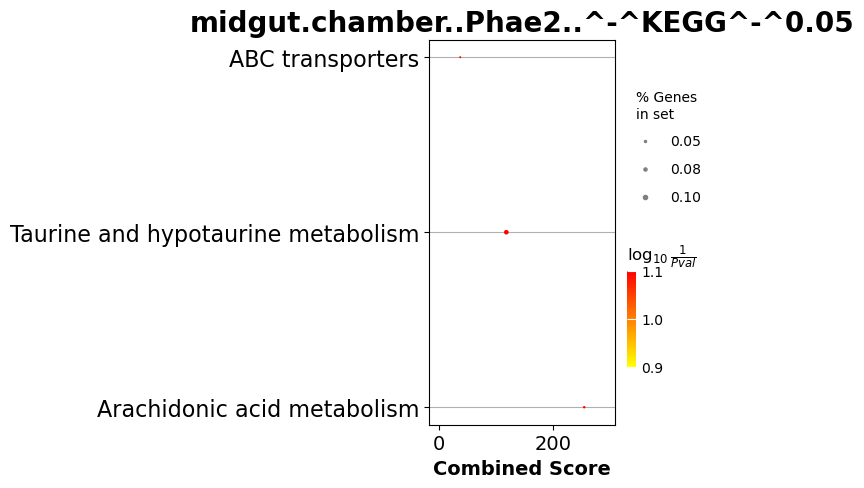

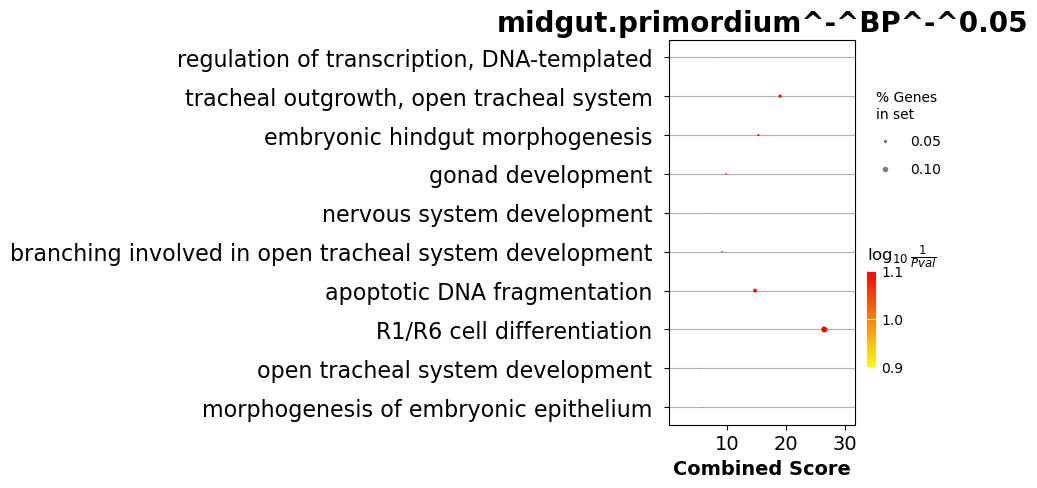

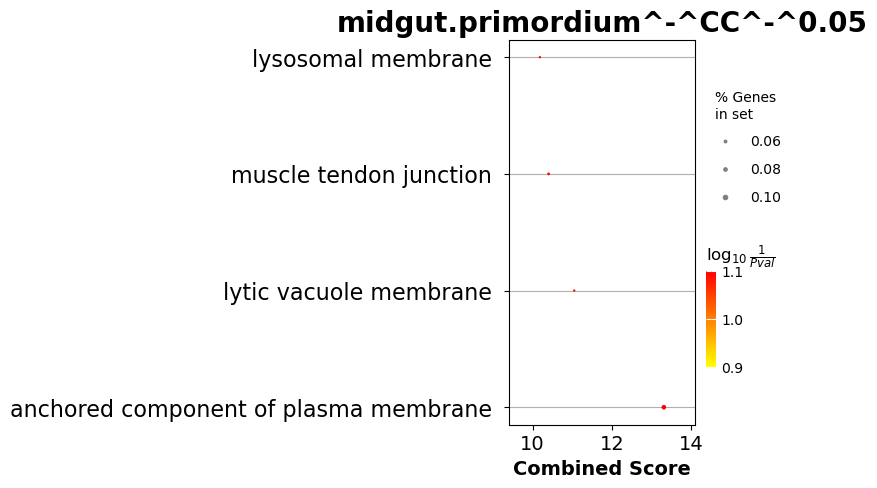

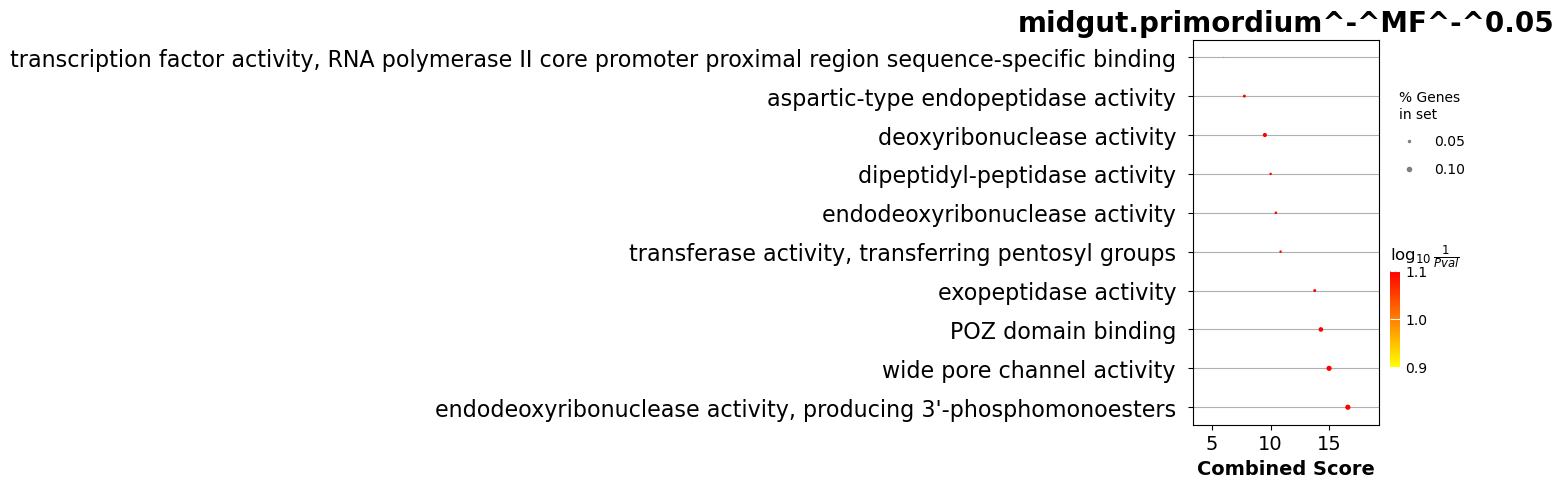

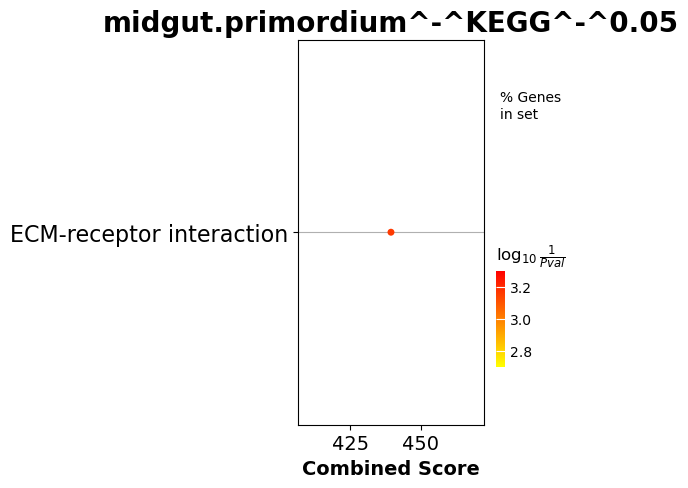

In [29]:
for cell, gene_list in cell_gene_dict.items():
    for library in libraries:
        try:
            go_analysis(gene_list=gene_list, gene_library=library, outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result', title=cell)
        except:
            try:
                go_analysis(gene_list=gene_list, gene_library=library, outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result', cut_off=0.1, title=cell)
            except:
                try:
                    go_analysis(gene_list=gene_list, gene_library=library, outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result', cut_off=0.5, title=cell)
                except:
                    try:
                        go_analysis(gene_list=gene_list, gene_library=library, outdir='/mnt/c/Users/ouyangkang/Desktop/GO_analysis/enrich_result', cut_off=1, title=cell)
                    except:
                        print(f"Sorry! No enrich terms")